### Prepare Data

In [ ]:
import numpy as np
import mdtraj as md
from msmbuilder.featurizer import AtomPairsFeaturizer
from msmbuilder.io import load_meta, preload_tops, save_trajs, save_generic
from multiprocessing import Pool
import contextlib

meta = load_meta("meta.pandas.pickl")
tops = preload_tops(meta)

atom_indices=np.array([9,26,40,59,80,92,104,111,118,139,151,170,187,194,215,234,253,270,289,306,320,346,358,374,386,403,419,434,453,462,474,490,502,516,527,538,548,567,586,605,616,628,647,669,686,708,720,736,748,767,783,804,814,825,840,850,870,889,910,927,941,948,969,980,994,1004,1019,1035,1054,1061,1085,1099,1109,1133,1153,1172,1189,1202,1214,1226,1233,1250,1266,1290,1302,1324,1335,1349,1373,1395,1416,1432,1444,1455,1469,1483,1502,1516,1530,1547,1571,1593,1603,1622,1634,1658,1672,1682,1697,1713,1730,1746,1761,1777,1793,1807,1827,1849,1871,1885,1892,1909,1933,1953,1969,1983,2003,2022,2036,2053,2074,2086,2102,2126,2138,2153,2167,2174,2189,2210,2234,2255,2266,2283,2290,2310,2327,2338])
atom=[]
for i in range(148):
    for j in range(i+1,148):
        atom += [[atom_indices[i],atom_indices[j]]]

alpha_carbon = AtomPairsFeaturizer(atom) ## for all atoms

def feat(irow):
    i, row = irow
    traj = md.load(row['traj_fn'], top=tops[row['top_fn']])
    feat_traj = alpha_carbon.partial_transform(traj)
    return i, feat_traj

with contextlib.closing(Pool(processes=2)) as pool:
    alcarbon = dict(pool.imap_unordered(feat, meta.iterrows()))
    
save_trajs(alcarbon, 'alpha_carbon', meta)   #save result
save_generic(alpha_carbon, 'alpha_carbon_featurizer.pickl')  #save model

all_data = np.concatenate([alcarbon[i] for i in range(12)])
np.save(all_data,'all_data')

In [1]:
import numpy as np
import mdtraj as md
from msmbuilder.featurizer import AtomPairsFeaturizer
from msmbuilder.io import load_meta, preload_tops, save_trajs, save_generic
from multiprocessing import Pool
import contextlib

meta = load_meta("meta.pandas.pickl")
tops = preload_tops(meta)

atom_indices=np.array([9,26,40,59,80,92,104,111,118,139,151,170,187,194,215,234,253,270,289,306,320,346,358,374,386,403,419,434,453,462,474,490,502,516,527,538,548,567,586,605,616,628,647,669,686,708,720,736,748,767,783,804,814,825,840,850,870,889,910,927,941,948,969,980,994,1004,1019,1035,1054,1061,1085,1099,1109,1133,1153,1172,1189,1202,1214,1226,1233,1250,1266,1290,1302,1324,1335,1349,1373,1395,1416,1432,1444,1455,1469,1483,1502,1516,1530,1547,1571,1593,1603,1622,1634,1658,1672,1682,1697,1713,1730,1746,1761,1777,1793,1807,1827,1849,1871,1885,1892,1909,1933,1953,1969,1983,2003,2022,2036,2053,2074,2086,2102,2126,2138,2153,2167,2174,2189,2210,2234,2255,2266,2283,2290,2310,2327,2338])
atom=[]
for i in range(148):
    for j in range(148):
        atom += [[atom_indices[i],atom_indices[j]]]

alpha_carbon = AtomPairsFeaturizer(atom) ## for all atoms

def feat(irow):
    i, row = irow
    traj = md.load(row['traj_fn'], top=tops[row['top_fn']])
    feat_traj = alpha_carbon.partial_transform(traj)
    return i, feat_traj

with contextlib.closing(Pool(processes=2)) as pool:
    alcarbon = dict(pool.imap_unordered(feat, meta.iterrows()))
    
save_trajs(alcarbon, 'alpha_carbon_sym', meta)   #save result
save_generic(alpha_carbon, 'alpha_carbon_featurizer_sym.pickl')  #save model

In [10]:
import numpy as np
import mdtraj as md
from msmbuilder.featurizer import AtomPairsFeaturizer
from msmbuilder.io import load_meta, load_trajs,preload_tops, save_trajs, save_generic
from multiprocessing import Pool
import contextlib

meta = load_meta("meta.pandas.pickl")
tops = preload_tops(meta)
meta, labels = load_trajs("macro-mapping")

for i in range(12):
    labels_one_hot = np.zeros((len(labels[i]),8))
    for j in range(len(labels[i])):
        labels_one_hot[j][int(labels[i][j])] = 1
    
    np.save("labels_onehot/"+str(i)+".npy", labels_one_hot)

In [21]:
a = np.load("labels_onehot/1.npy")
b = np.load("macro-mapping/1.npy")

In [24]:
for i in range(12):
    a = np.load("labels_onehot/"+str(i)+".npy")
    b = np.load("macro-mapping/"+str(i)+".npy")
    print(a[b==0])

[]
[]
[]
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  

In [ ]:
all_data = np.concatenate([alcarbon[i] for i in range(12)])
np.save('all_data',all_data)

In [1]:
### Machine Learning on All Data
import numpy as np
all_data_sample = np.load('all_data.npy')
labels = np.zeros(len(all_data_sample))
for i in range(12):
    labels[10000*i:10000*(i+1)] = np.load('macro-mapping/'+str(i)+'.npy')
np.save("all_data_label",labels)


In [6]:
labels

array([ 2.,  2.,  2., ...,  3.,  3.,  3.])

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=True, random_state=1)

for train_index, test_index in cv.split(all_data_sample):
    all_data_sample_train, all_data_sample_test = all_data_sample[train_index], all_data_sample[test_index]
    labels_train, labels_test = labels[train_index], labels[test_index]
    clf = tree.DecisionTreeClassifier()
    clf.fit(all_data_sample_train,labels_train)
    print("Train Accu: %.3f" %(np.sum(clf.predict(all_data_sample_train) == labels_train)*1.0/len(labels_train)))
    print("Test Accu: %.3f" %(np.sum(clf.predict(all_data_sample_test) == labels_test)*1.0/len(labels_test)))


/users/hongyuz/software/anaconda3/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:565: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


AttributeError: module 'numpy' has no attribute 'len'

In [8]:
from sklearn import tree
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    all_data_sample, labels, test_size=0.4, random_state=0)
    
clf = tree.DecisionTreeClassifier(max_depth=8)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [12]:
np.sum(y_train == clf.predict(X_train)) / len(y_train)

0.94723611111111106

In [13]:
np.sum(y_test == clf.predict(X_test)) / len(y_test)

0.92997916666666669

In [15]:
np.sum(clf.feature_importances_ != 0)

192

In [28]:
import graphviz 
dot_data = tree.export_graphviz(clf, class_names=['State '+ str(i) for i in range(1,9)],
                                filled=True, rounded=True,  
                                special_characters=True,out_file=None,
                               max_depth=6,rotate=True) 
graph = graphviz.Source(dot_data) 
graph.render('tree')
#graph

'tree.pdf'

### 1. Result Plot

In [1]:
import pandas as pd
import numpy as np
def read_log(file):
    data = []
    for line in open(file):
        l = line.strip('\n').split()
        data += [{'fold': int(l[1]),
                'depth': float(l[3]),
                'train_accu': float(l[6]),
                'test_accu': float(l[9])}]
    data = pd.DataFrame(data)
    median = data.groupby("depth").aggregate(np.median)
    std = data.groupby("depth").aggregate(np.std)
    mean = data.groupby("depth").aggregate(np.mean)
    return (data, median, std, mean)
    
nn_data, nn_median, nn_std, nn_mean = read_log("model_selection/NeuralNetwork.log");
dt_data, dt_median, dt_std, dt_mean = read_log("model_selection/DecisionTree.log");
rf_data, rf_median, rf_std, rf_mean = read_log("model_selection/RandomForest.log");
ovorf_data, ovorf_median, ovorf_std, ovorf_mean = read_log("model_selection/OvO-RandomForest.log");

In [2]:
import seaborn as sns
sns.set_style('ticks')
current_palette = sns.color_palette()

In [7]:
print(max(nn_mean['train_accu']),max(dt_mean['train_accu']),max(rf_mean['train_accu']),max(ovorf_mean['train_accu']))
print(max(nn_mean['test_accu']),max(dt_mean['test_accu']),max(rf_mean['test_accu']),max(ovorf_mean['test_accu']))

0.949545454545 0.983166666667 0.981416666667 0.99125
0.901666666667 0.820083333333 0.772166666667 0.81725


/users/hongyuz/software/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


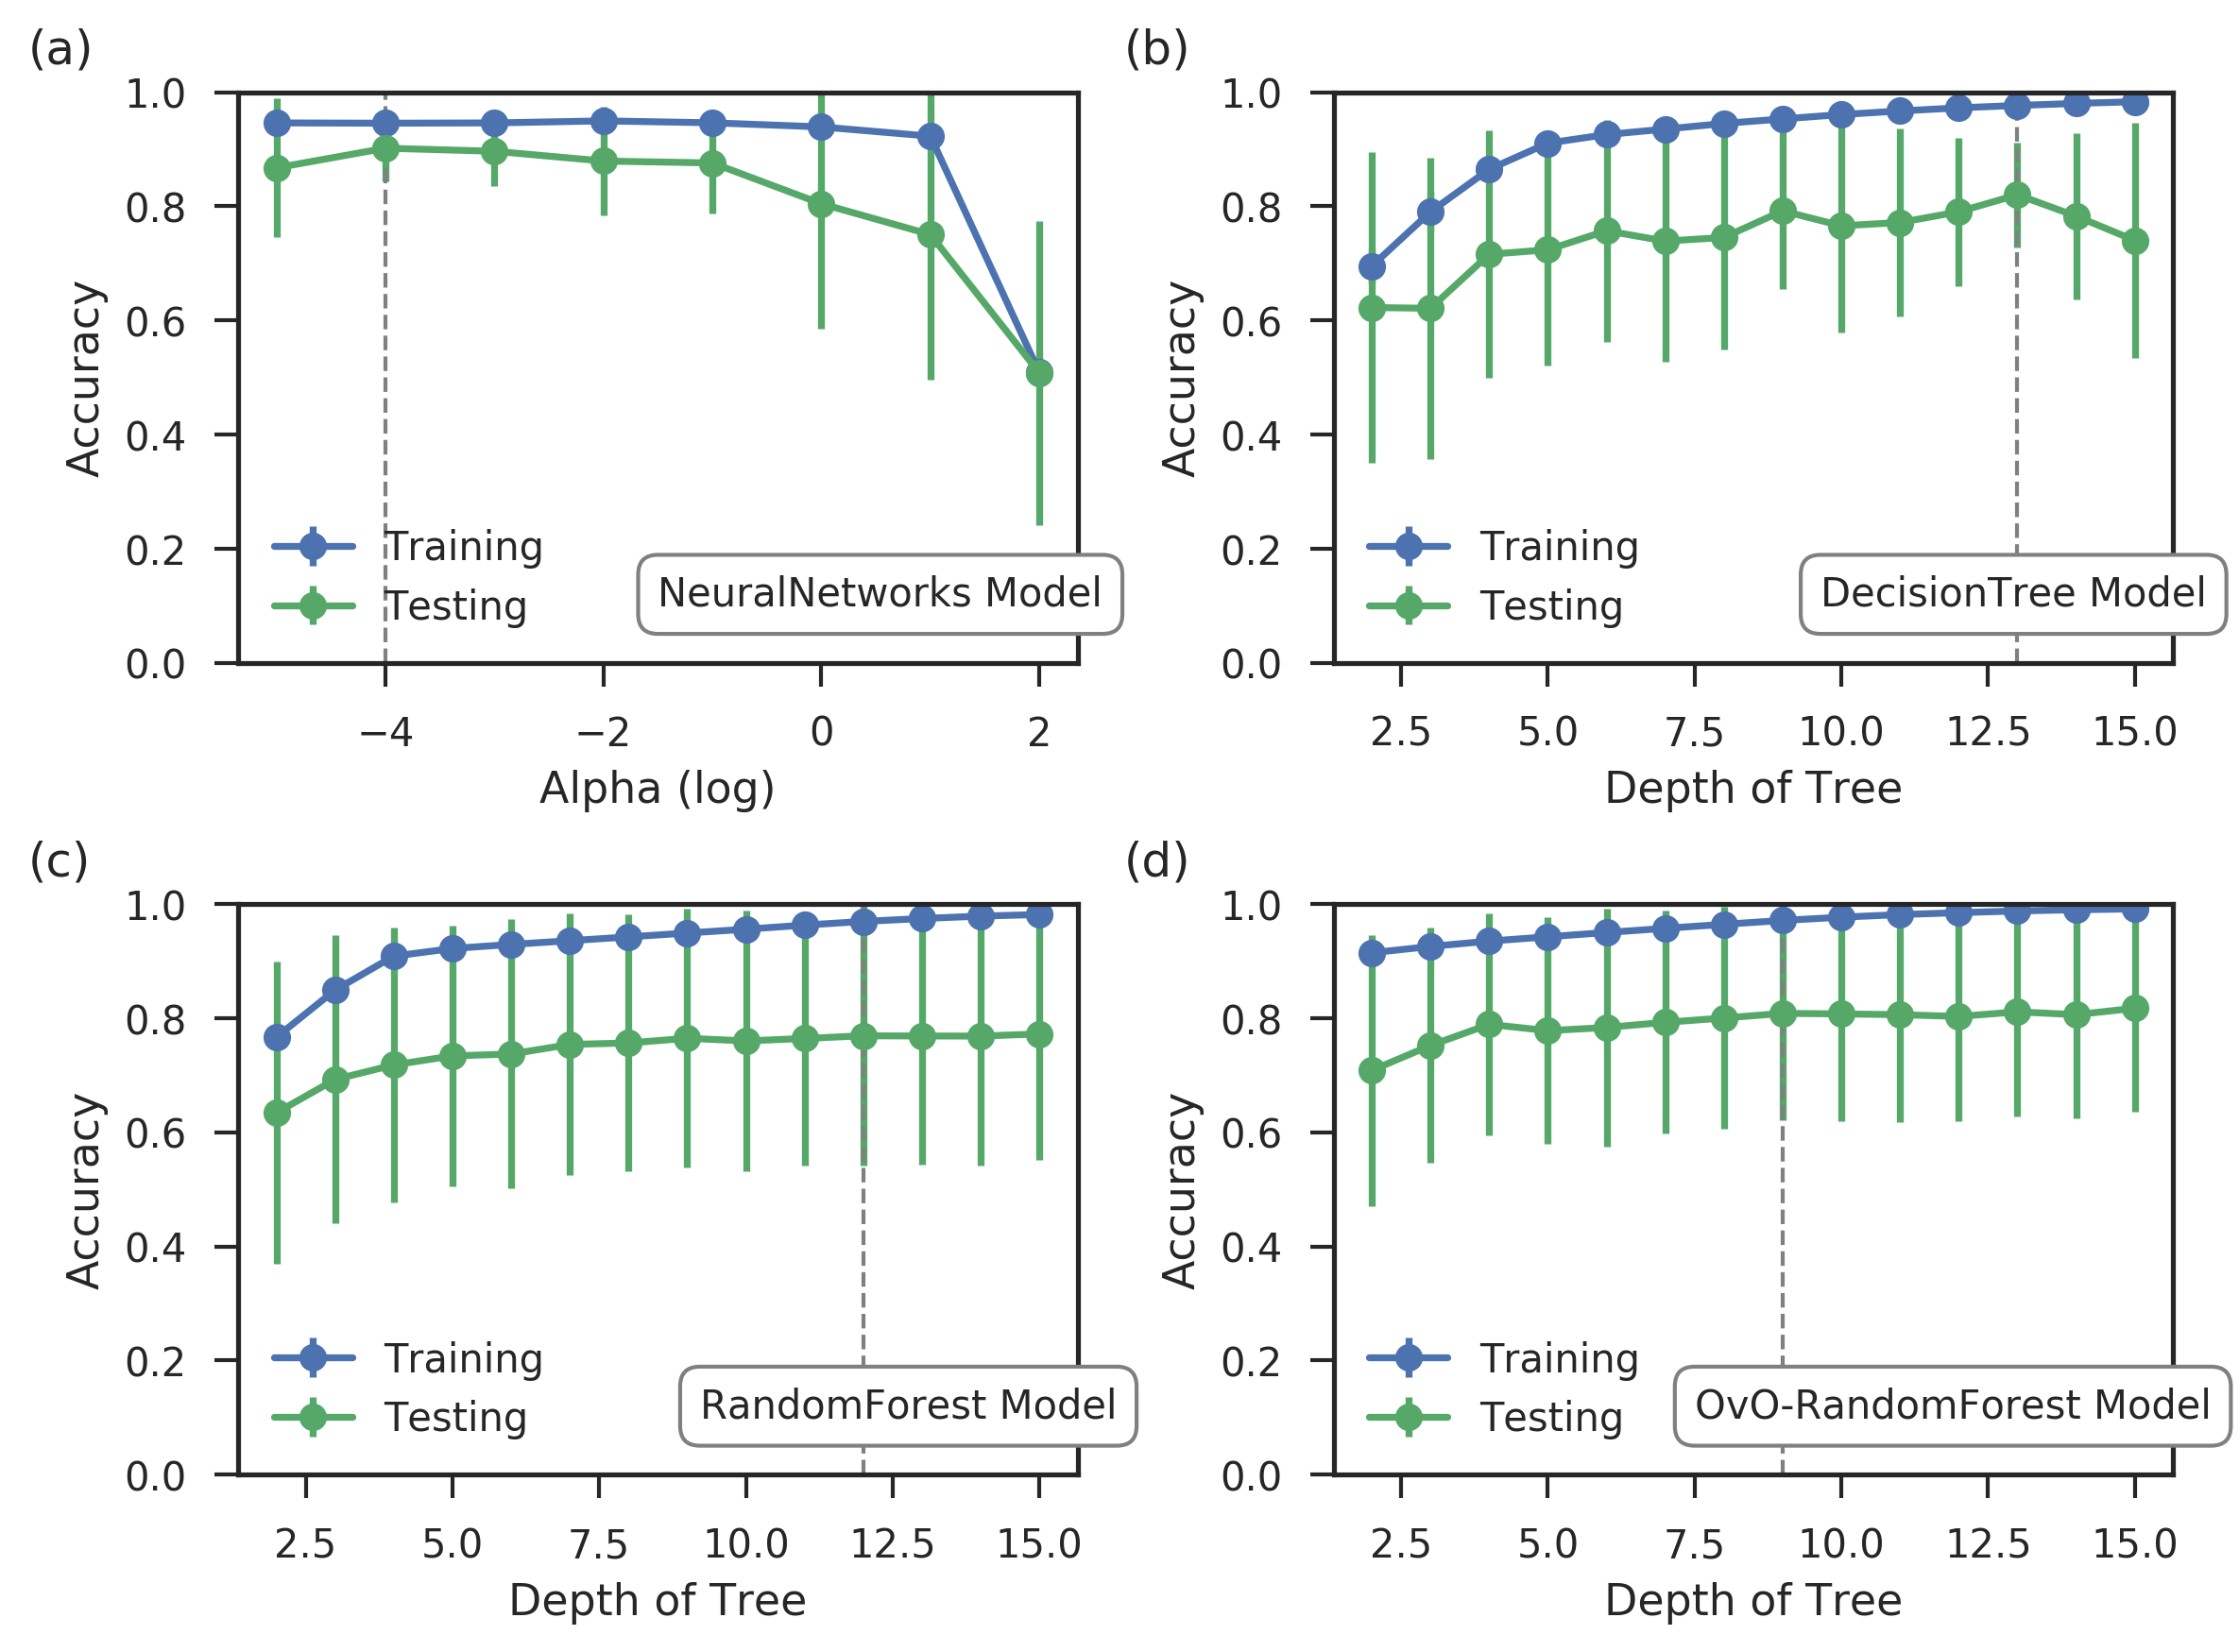

In [113]:
np.array(median['train_accu'])
%matplotlib inline
import matplotlib as mpl
mpl.rcParams.update({'font.size':18})

import matplotlib.pyplot as plt
bbox_props = dict(boxstyle="round,pad=0.5", fc="white", ec="gray", lw=1)
fig = plt.figure(figsize=(8,6),dpi=300)
ax = plt.subplot(2,2,1)
plt.errorbar(np.array(nn_mean.index), np.array(nn_mean['train_accu']), yerr=np.array(nn_std['train_accu']),fmt='o-',label='Training')
plt.errorbar(np.array(nn_mean.index), np.array(nn_mean['test_accu']), yerr=np.array(nn_std['test_accu']),fmt='o-',label='Testing')
plt.ylim([0,1])
plt.xlabel('Alpha (log)')
plt.ylabel('Accuracy')
plt.text(0.50,0.1,'NeuralNetworks Model',ha='left',bbox=bbox_props,transform=ax.transAxes,fontsize=10)
plt.axvline(x=-4,ls='--',lw=1,color='grey')
plt.legend(loc=3)
plt.text(-0.25,1.05,'(a)',transform=ax.transAxes,fontsize=12)

ax = plt.subplot(2,2,2)
plt.errorbar(np.array(dt_mean.index), np.array(dt_mean['train_accu']), yerr=np.array(dt_std['train_accu']),fmt='o-',label='Training')
plt.errorbar(np.array(dt_mean.index), np.array(dt_mean['test_accu']), yerr=np.array(dt_std['test_accu']),fmt='o-',label='Testing')
plt.ylim([0,1])
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.text(0.58,0.1,'DecisionTree Model',ha='left',bbox=bbox_props,transform=ax.transAxes,fontsize=10)
plt.axvline(x=13,ls='--',lw=1,color='grey')
plt.legend(loc=3)
plt.text(-0.25,1.05,'(b)',transform=ax.transAxes,fontsize=12)

ax = plt.subplot(2,2,3)
plt.errorbar(np.array(rf_mean.index), np.array(rf_mean['train_accu']), yerr=np.array(rf_std['train_accu']),fmt='o-',label='Training')
plt.errorbar(np.array(rf_mean.index), np.array(rf_mean['test_accu']), yerr=np.array(rf_std['test_accu']),fmt='o-',label='Testing')
plt.ylim([0,1])
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.text(0.55,0.1,'RandomForest Model',ha='left',bbox=bbox_props,transform=ax.transAxes,fontsize=10)
plt.axvline(x=12,ls='--',lw=1,color='grey')
plt.legend(loc=3)
plt.text(-0.25,1.05,'(c)',transform=ax.transAxes,fontsize=12)

ax = plt.subplot(2,2,4)
plt.errorbar(np.array(ovorf_mean.index), np.array(ovorf_mean['train_accu']), yerr=np.array(ovorf_std['train_accu']),fmt='o-',label='Training')
plt.errorbar(np.array(ovorf_mean.index), np.array(ovorf_mean['test_accu']), yerr=np.array(ovorf_std['test_accu']),fmt='o-',label='Testing')
plt.ylim([0,1])
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.legend(loc=3)
plt.text(0.43,0.1,'OvO-RandomForest Model',ha='left',bbox=bbox_props,transform=ax.transAxes,fontsize=10)
plt.axvline(x=9,ls='--',lw=1,color='grey')
plt.text(-0.25,1.05,'(d)',transform=ax.transAxes,fontsize=12)

plt.tight_layout()
plt.savefig('Figure6.png')

#### Box plot for different parameter

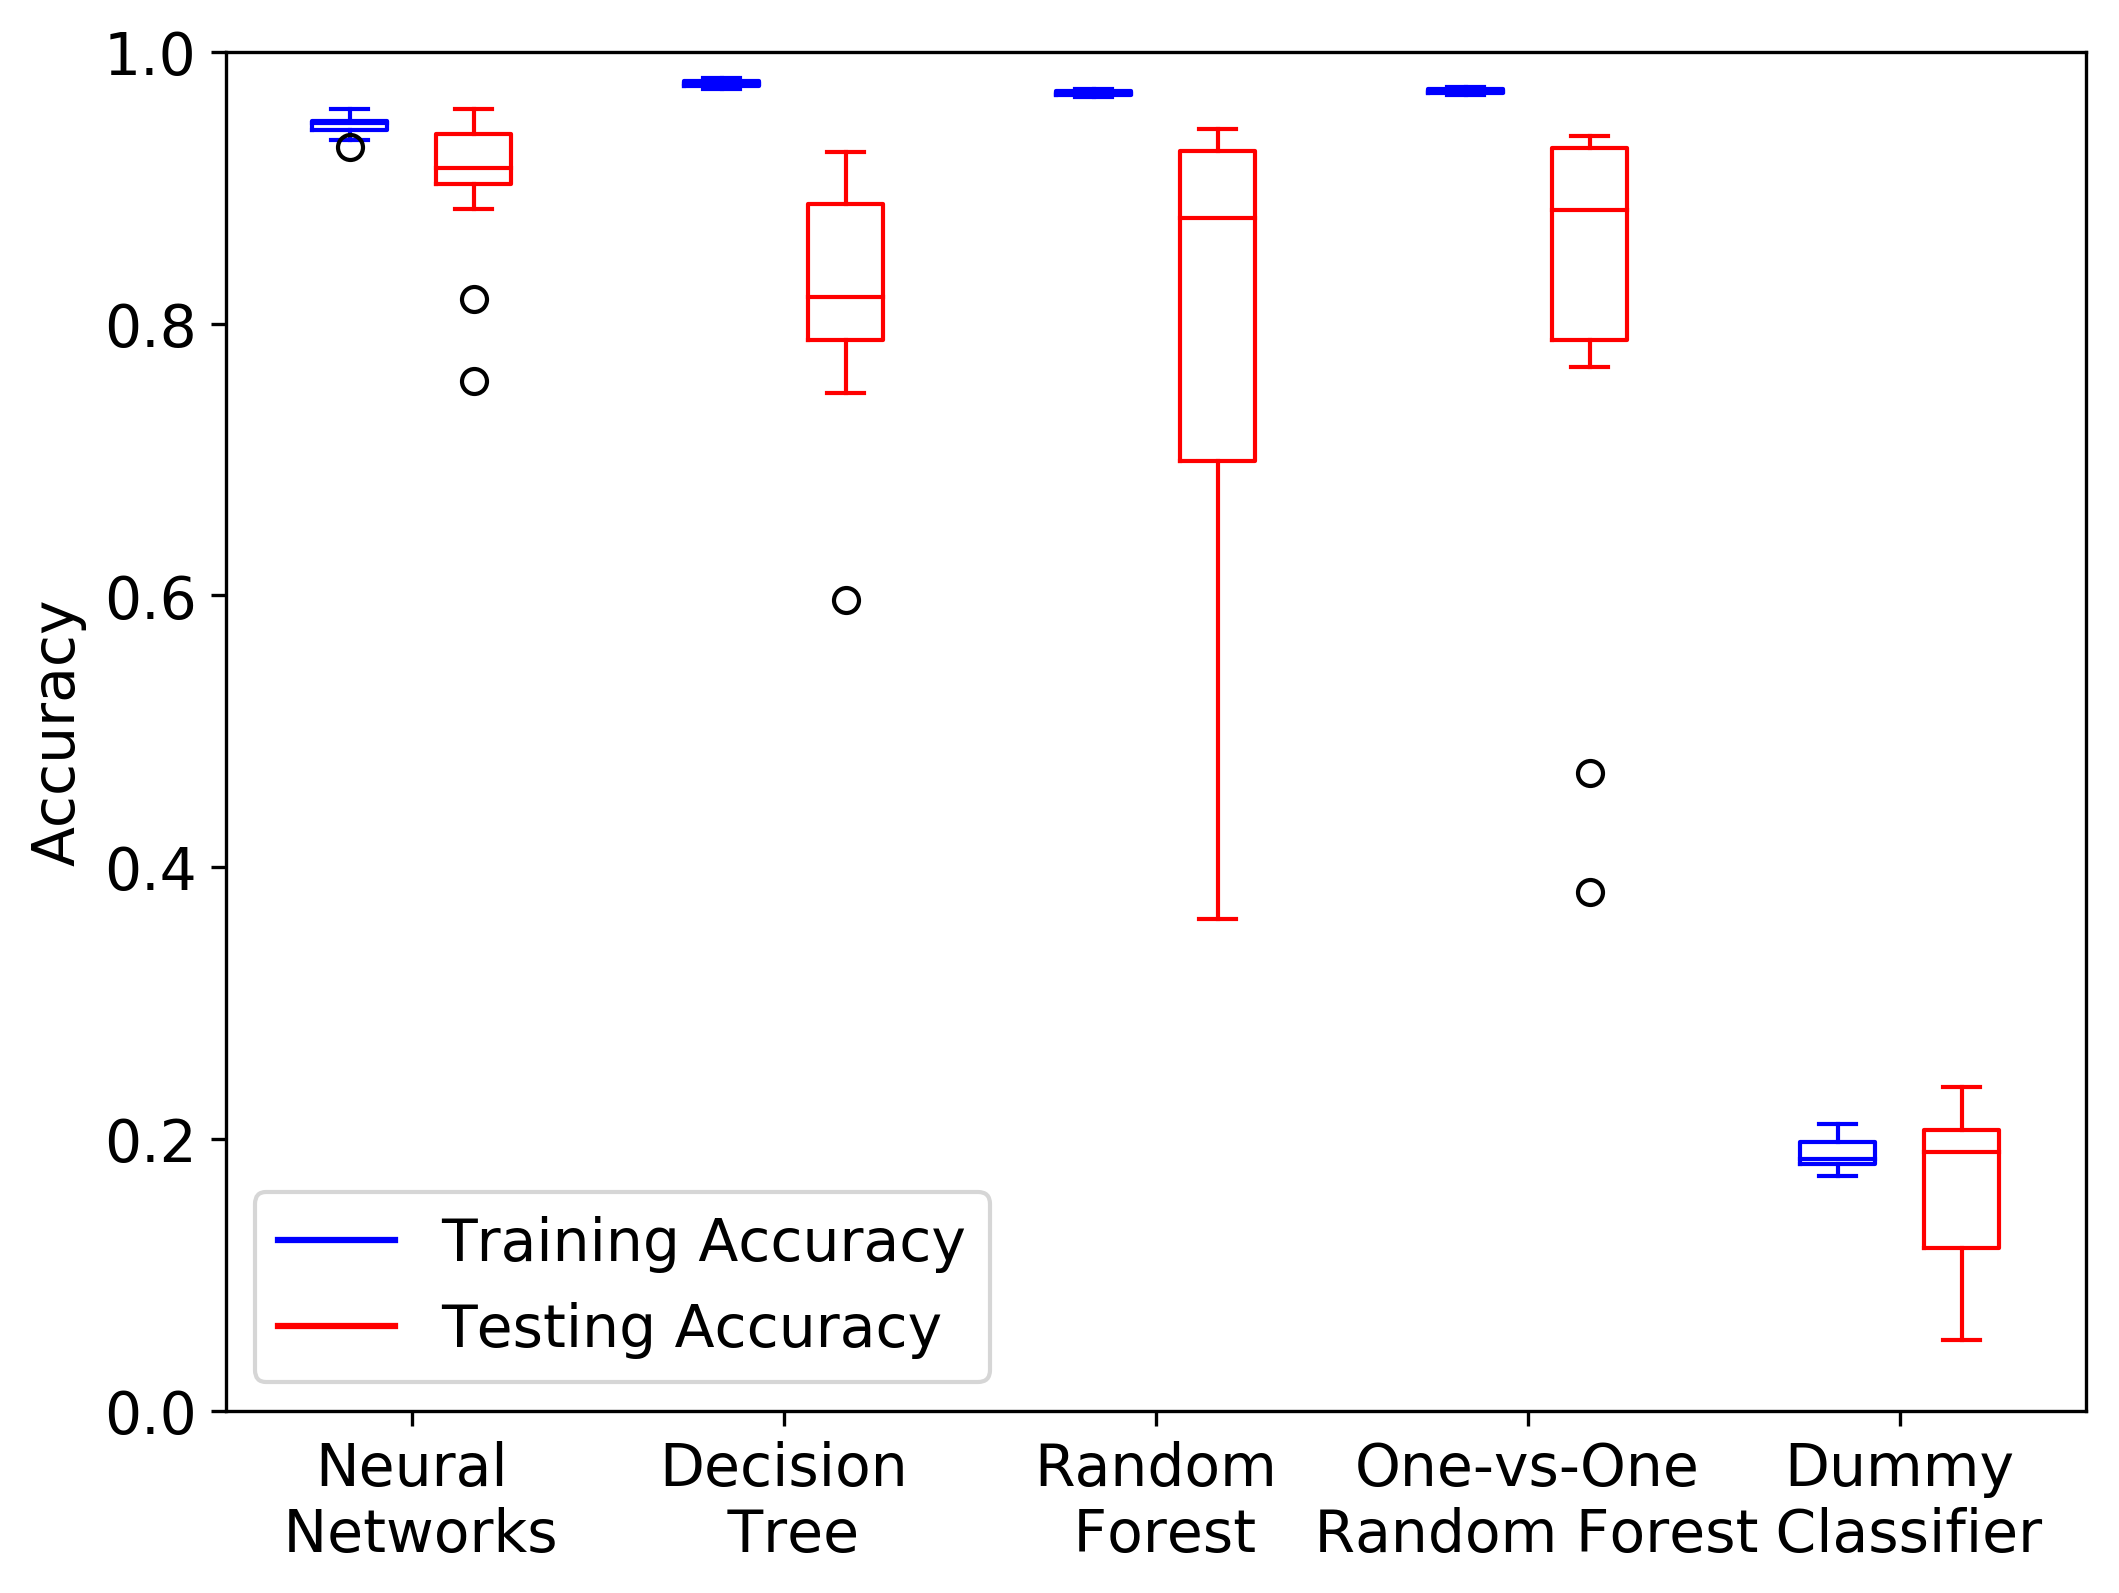

In [46]:
%matplotlib inline
import matplotlib as mpl
from matplotlib.artist import setp
mpl.rcParams.update({'font.size':14})
import matplotlib.pyplot as plt
def setBoxColors(bp):
    setp(bp['boxes'][0], color='blue')
    setp(bp['caps'][0], color='blue')
    setp(bp['caps'][1], color='blue')
    setp(bp['whiskers'][0], color='blue')
    setp(bp['whiskers'][1], color='blue')
    setp(bp['fliers'][0], color='blue')
    #setp(bp['fliers'][1], color='blue')
    setp(bp['medians'][0], color='blue')

    setp(bp['boxes'][1], color='red')
    setp(bp['caps'][2], color='red')
    setp(bp['caps'][3], color='red')
    setp(bp['whiskers'][2], color='red')
    setp(bp['whiskers'][3], color='red')
    setp(bp['fliers'][1], color='red')
    #setp(bp['fliers'][3], color='red')
    setp(bp['medians'][1], color='red')

plt.figure(dpi=300,figsize=(8,6))
ax = plt.gca()

data = [np.array(nn_data[nn_data['depth'] == -4]['train_accu']),
         np.array(nn_data[nn_data['depth'] == -4]['test_accu'])]
bp = plt.boxplot(data, positions = [1, 2], widths = 0.6)
setBoxColors(bp)

data = [np.array(dt_data[dt_data['depth'] == 13]['train_accu']),
         np.array(dt_data[dt_data['depth'] == 13]['test_accu'])]
bp = plt.boxplot(data, positions = [4, 5], widths = 0.6)
setBoxColors(bp)

data = [np.array(rf_data[rf_data['depth'] == 12]['train_accu']),
         np.array(rf_data[rf_data['depth'] == 12]['test_accu'])]
bp = plt.boxplot(data, 0, positions = [7, 8], widths = 0.6)
setBoxColors(bp)

data = [np.array(ovorf_data[ovorf_data['depth'] == 9]['train_accu']),
         np.array(ovorf_data[ovorf_data['depth'] == 9]['test_accu'])]
bp = plt.boxplot(data, 0, positions = [10, 11], widths = 0.6)
setBoxColors(bp)

data = [np.loadtxt("Dummy.log", usecols=(4,)),
       np.loadtxt("Dummy.log", usecols=(7,)),]
bp = plt.boxplot(data, 0, positions = [13, 14], widths = 0.6)
setBoxColors(bp)

ax.set_xlim(0,15)
ax.set_ylim(0,1)
ax.set_xticklabels(['Neural\n Networks', 'Decision\n Tree','Random\n Forest','One-vs-One\n Random Forest','Dummy\n Classifier'],fontsize=14)
ax.set_xticks([1.5, 4.5, 7.5,10.5, 13.5])

hB, = plt.plot([1,1],'b-')
hR, = plt.plot([1,1],'r-')
plt.legend((hB, hR),('Training Accuracy', 'Testing Accuracy'))
hB.set_visible(False)
hR.set_visible(False)

plt.ylabel("Accuracy")

plt.savefig('Figure7.png')

### Important Features

In [86]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.externals import joblib

clf = joblib.load('ovo-randomforest/final_9.pkl')

In [87]:
clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.])

In [88]:
a = np.load('alpha_carbon/0.npy')
clf.decision_function([a[0]])

array([[ 0.5       ,  4.91814813,  7.17458672,  2.89260726,  4.08792421,
        -0.16760131,  6.43413575,  2.16019925]])

In [89]:
feature_imp = np.zeros(len(clf.estimators_[0].feature_importances_))

In [90]:
for es in clf.estimators_:
    feature_imp += es.feature_importances_ 
feature_imp = feature_imp/len(clf.estimators_)

In [91]:
feature_imp_array = np.array([[i,v] for i,v in enumerate(feature_imp*100)])

In [92]:
feature_imp_array_sort = feature_imp_array[feature_imp_array[:,1].argsort()]

In [93]:
np.set_printoptions(suppress=True)
feature_imp_array_sort[::-1][0:100]

array([[  213.        ,     2.82912888],
       [  227.        ,     2.38519834],
       [  189.        ,     1.75424335],
       [   29.        ,     1.51931252],
       [  355.        ,     1.51262594],
       [  483.        ,     1.50697554],
       [  178.        ,     1.46913629],
       [  481.        ,     1.41151491],
       [   44.        ,     1.28814695],
       [  358.        ,     1.26733288],
       [  321.        ,     1.25767365],
       [  214.        ,     1.13359676],
       [  588.        ,     1.12406915],
       [   42.        ,     1.10476221],
       [   17.        ,     1.08703359],
       [   14.        ,     1.06309329],
       [   81.        ,     1.06257174],
       [   46.        ,     1.02135466],
       [   28.        ,     0.99479411],
       [  209.        ,     0.96480334],
       [  504.        ,     0.8399817 ],
       [  305.        ,     0.83283085],
       [  290.        ,     0.83100454],
       [  190.        ,     0.82026125],
       [  437.  

In [94]:
len(feature_imp_array_sort[::-1][:,1])

10878

In [95]:
feature_imp_sort = np.zeros(len(feature_imp_array_sort[::-1][:,1]))
feature_imp_sort[0] = feature_imp_array_sort[::-1][:,1][0]
for i in range(1,len(feature_imp_sort)):
    feature_imp_sort[i] = feature_imp_sort[i-1] + feature_imp_array_sort[::-1][:,1][i]

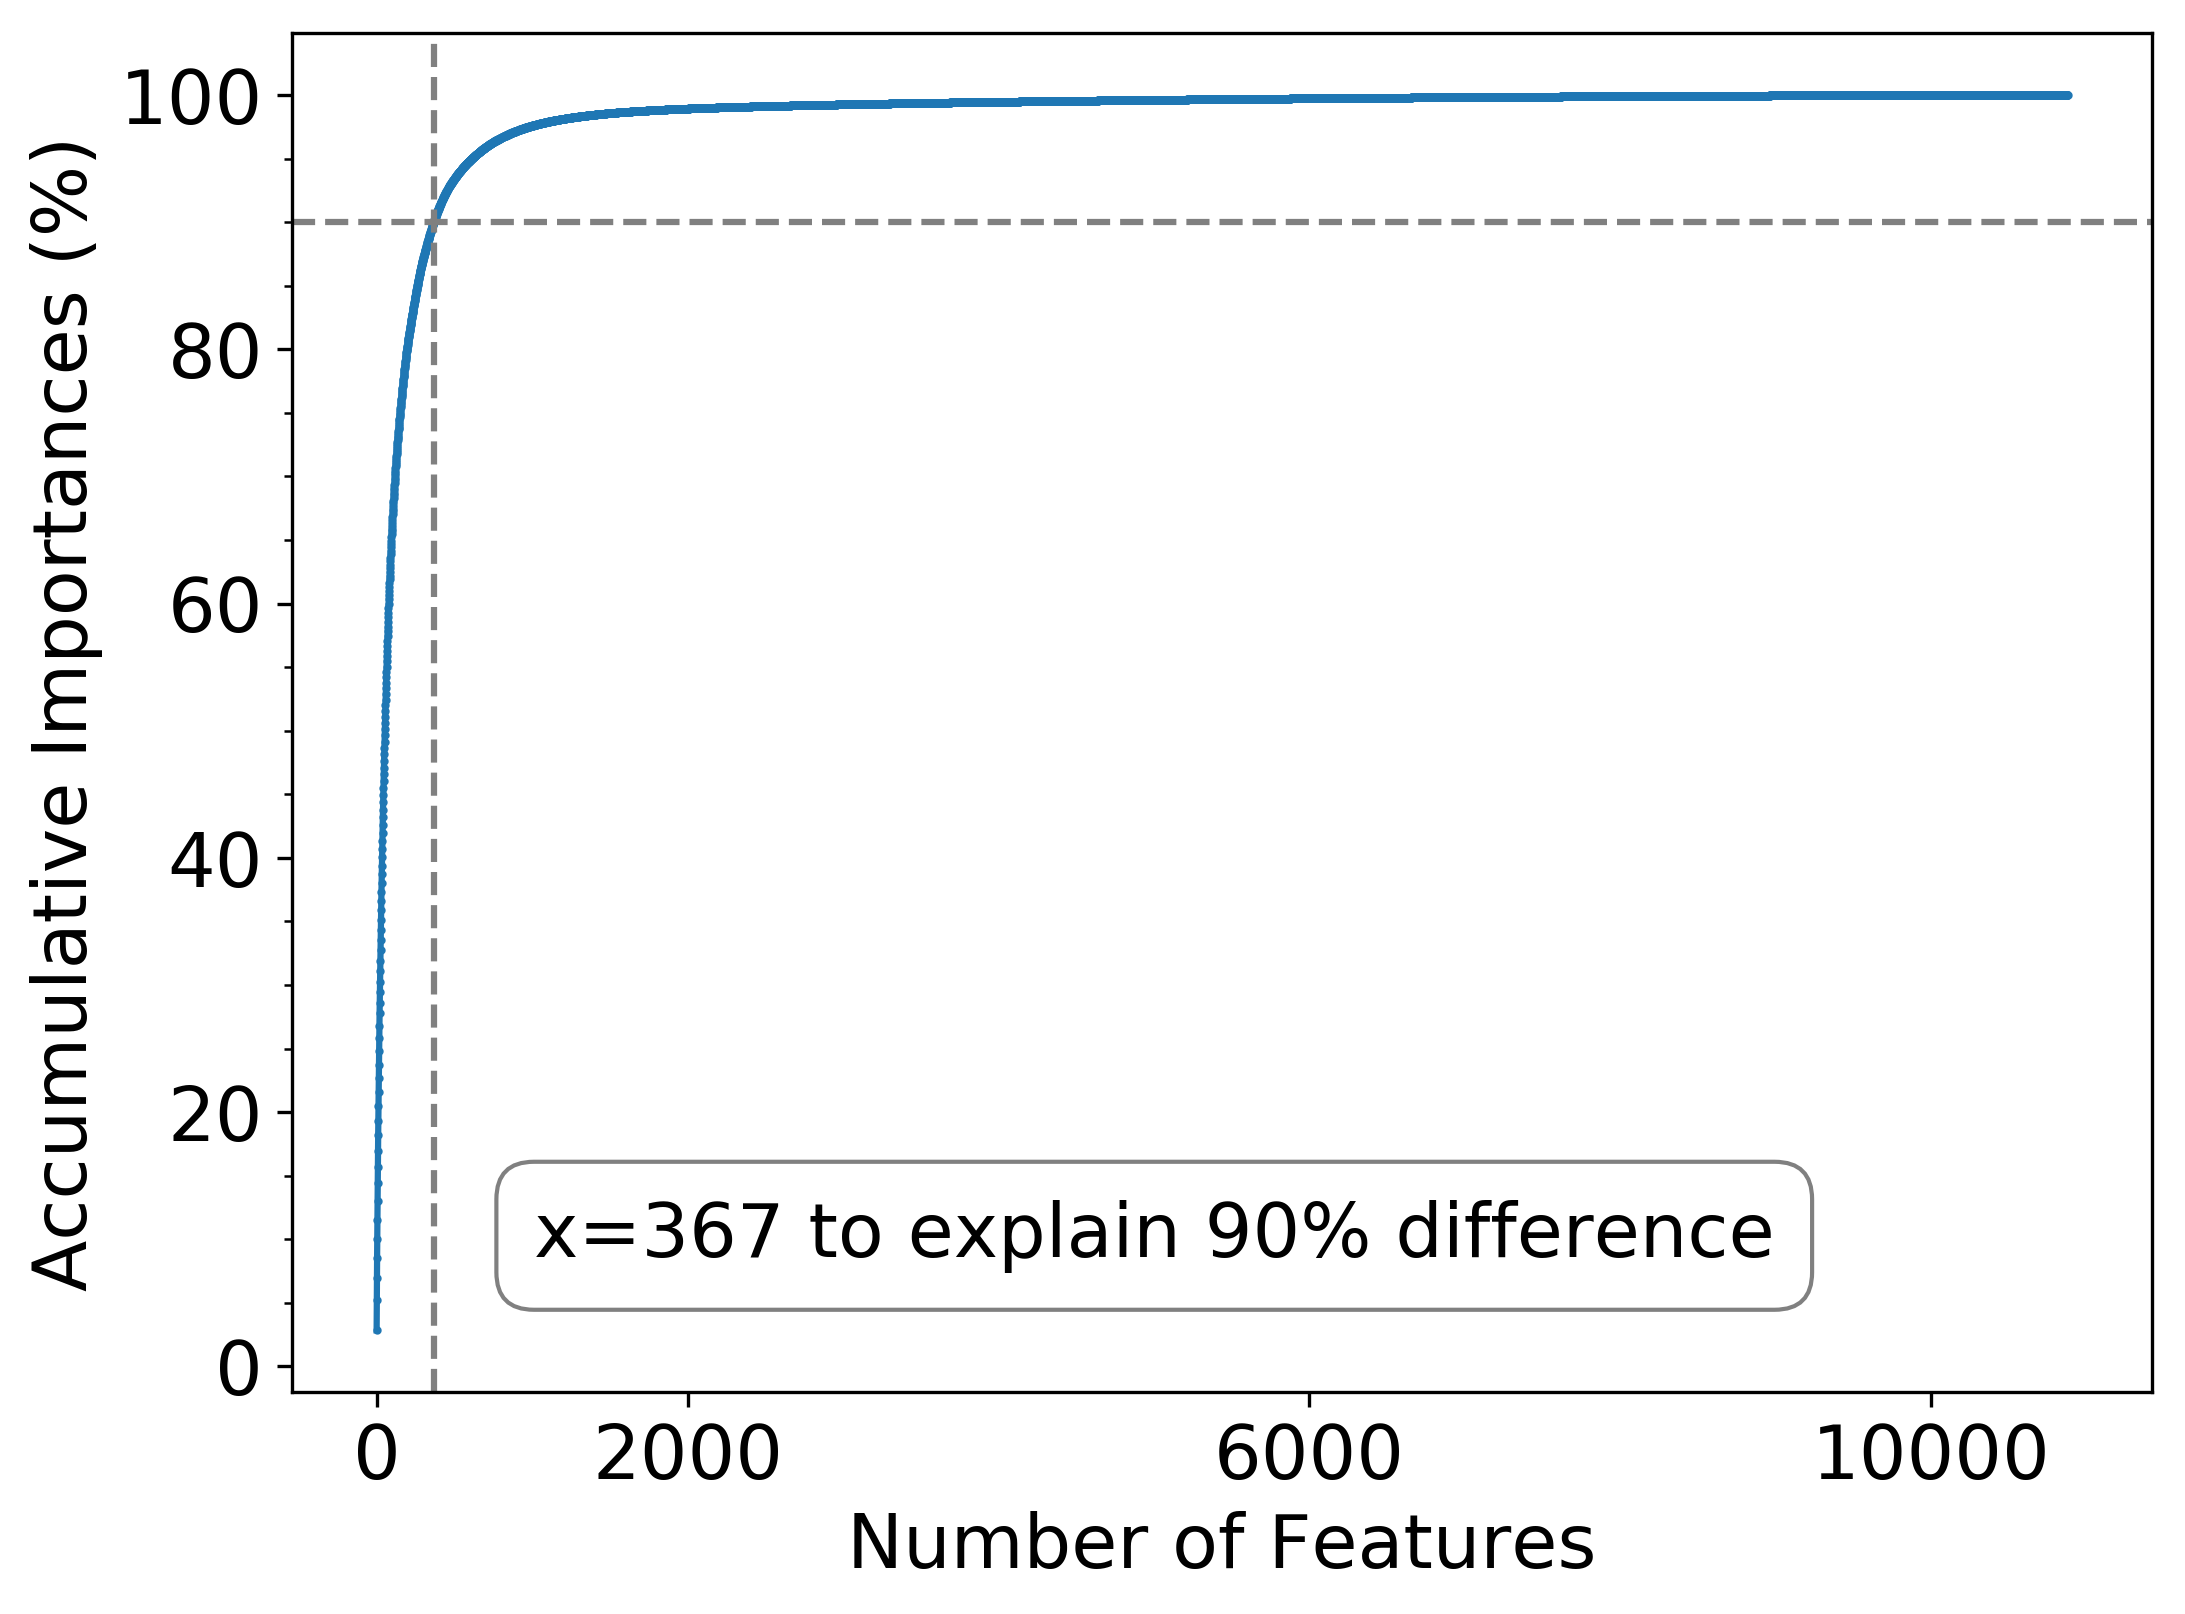

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({'font.size':18})
bbox_props = dict(boxstyle="round,pad=0.5", fc="white", ec="gray", lw=1)
plt.figure(figsize=(8,6),dpi=300)
ax=plt.gca()
plt.plot(np.arange(len(feature_imp_sort)), feature_imp_sort,'o-',ms=1)
plt.xlabel("Number of Features")
plt.ylabel("Accumulative Importances (%)")
plt.axvline(x=367,ls='--',color='grey')
plt.axhline(y=90,ls='--',color='grey')
plt.text(0.13,0.1,"x=367 to explain 90% difference", bbox=bbox_props,transform=ax.transAxes)

#plt.yticks(np.arange(0,105,10))
ax.set_yticks(np.arange(0,105,5), minor = True)
ax.set_xticks([0,2000,6000,10000])
plt.savefig("Figure8.png")

In [73]:
len(feature_imp_sort[feature_imp_sort < 90])

367

In [135]:
### Build Feature Importances Dataframe

all_feature = np.zeros((len(feature_imp_sort),len(clf.estimators_)))
for i in range(len(clf.estimators_)):
    all_feature[:,i] = clf.estimators_[i].feature_importances_

In [136]:
import pandas as pd
all_feature = pd.DataFrame(all_feature)

In [137]:
all_feature[1]

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
5        0.000000
6        0.000000
7        0.000000
8        0.000000
9        0.000000
10       0.000000
11       0.000000
12       0.000010
13       0.019979
14       0.020631
15       0.000000
16       0.000000
17       0.020000
18       0.020010
19       0.000000
20       0.000000
21       0.000000
22       0.000000
23       0.000000
24       0.000000
25       0.000836
26       0.000000
27       0.000000
28       0.000000
29       0.019969
           ...   
10848    0.000000
10849    0.000000
10850    0.000000
10851    0.000000
10852    0.000000
10853    0.000000
10854    0.000000
10855    0.000000
10856    0.000000
10857    0.000000
10858    0.000000
10859    0.000000
10860    0.000000
10861    0.000000
10862    0.000000
10863    0.000000
10864    0.000000
10865    0.000000
10866    0.000000
10867    0.000000
10868    0.000000
10869    0.000000
10870    0.000000
10871    0.000000
10872    0

In [138]:
columns = []
for i in range(8):
    for j in range(i+1,8):
        columns += ["s"+str(i+1)+"_s"+str(j+1)]

In [139]:
all_feature.columns = columns

In [140]:
all_feature['OverallImp'] = all_feature.mean(axis=1)

In [143]:
distance = []
for i in range(148):
    for j in range(i+1,148):
        distance += ["c"+str(i+1)+"_c"+str(j+1)]

In [145]:
all_feature['distance']= distance

In [146]:
all_feature

,s1_s2,s1_s3,s1_s4,s1_s5,s1_s6,s1_s7,s1_s8,s2_s3,s2_s4,s2_s5,...,s4_s7,s4_s8,s5_s6,s5_s7,s5_s8,s6_s7,s6_s8,s7_s8,OverallImp,distance
0,0.000000,0.000000,0.000000,0.000000,0.000006,0.000000e+00,0.000000,0.000012,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,1.174182e-06,c1_c2
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000008,0.000000,0.000000,0.000000,0.000000,6.886036e-07,c1_c3
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000003,0.000000e+00,0.000000,...,5.473502e-06,7.255077e-06,0.000000,0.000036,0.000000,0.000000,0.000000,0.000000,9.152083e-06,c1_c4
3,0.000000,0.000000,0.000077,0.000027,0.000186,0.000000e+00,0.000117,0.000065,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.609639e-05,c1_c5
4,0.000000,0.000000,0.000175,0.000000,0.000000,0.000000e+00,0.000000,0.000018,0.000000e+00,0.000036,...,7.342968e-06,0.000000e+00,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,2.088871e-05,c1_c6
5,0.000000,0.000000,0.000075,0.000000,0.000000,0.000000e+00,0.000000,0.000006,0.000000e+00,0.000057,...,0.000000e+00,0.000000e+00,0.000000,0.000019,0.000025,0.000000,0.000000,0.000000,5.054914e-05,c1_c7
6,0.000000,0.000000,0.000363,0.000026,0.000070,0.000000e+00,0.000000,0.000000,1.040038e-05,0.000000,...,1.881495e-05,0.000000e+00,0.000000,0.000016,0.000010,0.000000,0.000000,0.000000,8.238932e-05,c1_c8
7,0.000000,0.000000,0.000298,0.000000,0.000565,0.000000e+00,0.000000,0.000036,7.127140e-05,0.002950,...,1.764412e-05,0.000000e+00,0.000546,0.000311,0.000000,0.000000,0.000000,0.000000,3.752189e-04,c1_c9
8,0.000000,0.000000,0.000000,0.000107,0.000066,0.000000e+00,0.000000,0.000000,7.908951e-05,0.000652,...,2.659446e-04,3.583513e-05,0.000024,0.000190,0.000000,0.000000,0.000000,0.000000,1.890428e-04,c1_c10
9,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000451,...,0.000000e+00,0.000000e+00,0.000000,0.001125,0.000000,0.000000,0.000000,0.000000,8.971179e-05,c1_c11


In [147]:
all_feature.sort_values(by='OverallImp',ascending=False)

,s1_s2,s1_s3,s1_s4,s1_s5,s1_s6,s1_s7,s1_s8,s2_s3,s2_s4,s2_s5,...,s4_s7,s4_s8,s5_s6,s5_s7,s5_s8,s6_s7,s6_s8,s7_s8,OverallImp,distance
213,0.019965,0.040000,0.000000,0.036966,0.036348,4.037631e-02,0.018564,0.000002,0.039486,0.031295,...,0.039279,0.000000,0.040080,0.029319,0.000031,0.039981,0.039864,0.019888,0.028291,c2_c69
227,0.039794,0.040000,0.000000,0.000000,0.035018,3.655606e-02,0.018622,0.000000,0.045547,0.039443,...,0.036638,0.000000,0.039078,0.007730,0.000030,0.039951,0.039700,0.000010,0.023852,c2_c83
189,0.000053,0.020000,0.000040,0.029266,0.016497,4.023518e-02,0.003944,0.000055,0.000990,0.040843,...,0.038454,0.000000,0.019339,0.026552,0.001175,0.000000,0.000000,0.019789,0.017542,c2_c45
29,0.019988,0.019969,0.000647,0.037254,0.000000,4.050342e-02,0.000075,0.000000,0.000008,0.031025,...,0.000021,0.000000,0.000000,0.022913,0.018278,0.019709,0.000000,0.039799,0.015193,c1_c31
355,0.000000,0.000000,0.001803,0.015108,0.053157,1.939797e-07,0.000078,0.000450,0.038189,0.000094,...,0.054850,0.000154,0.057199,0.018712,0.000026,0.039484,0.039612,0.000000,0.015126,c3_c66
483,0.019209,0.019975,0.000182,0.029368,0.016578,1.688377e-02,0.000000,0.000025,0.017789,0.000000,...,0.017160,0.000000,0.039422,0.000336,0.000000,0.039880,0.039898,0.000000,0.015070,c4_c50
178,0.039965,0.039949,0.000000,0.000013,0.009581,3.419048e-02,0.000030,0.000010,0.030860,0.027572,...,0.012410,0.000004,0.000188,0.000324,0.000240,0.000072,0.019141,0.039753,0.014691,c2_c34
481,0.000211,0.040000,0.000000,0.000015,0.000424,2.689291e-04,0.000000,0.001133,0.039018,0.011384,...,0.037519,0.000000,0.019157,0.012982,0.000000,0.039793,0.019932,0.000000,0.014115,c4_c48
44,0.019367,0.040163,0.000000,0.000207,0.000336,0.000000e+00,0.000000,0.000072,0.036617,0.015442,...,0.045700,0.000000,0.000000,0.001348,0.000000,0.019841,0.000000,0.000000,0.012881,c1_c46
358,0.020054,0.020000,0.000134,0.018328,0.020332,2.056922e-02,0.000049,0.000377,0.020129,0.016885,...,0.021269,0.000000,0.021067,0.018049,0.000000,0.020509,0.019864,0.000000,0.012673,c3_c69


In [148]:
all_feature_sort = all_feature.sort_values(by='OverallImp',ascending=False)

In [151]:
all_feature_sort.iloc[0:10]

,s1_s2,s1_s3,s1_s4,s1_s5,s1_s6,s1_s7,s1_s8,s2_s3,s2_s4,s2_s5,...,s4_s7,s4_s8,s5_s6,s5_s7,s5_s8,s6_s7,s6_s8,s7_s8,OverallImp,distance
213,0.019965,0.040000,0.000000,0.036966,0.036348,4.037631e-02,0.018564,0.000002,0.039486,0.031295,...,0.039279,0.000000,0.040080,0.029319,0.000031,0.039981,0.039864,0.019888,0.028291,c2_c69
227,0.039794,0.040000,0.000000,0.000000,0.035018,3.655606e-02,0.018622,0.000000,0.045547,0.039443,...,0.036638,0.000000,0.039078,0.007730,0.000030,0.039951,0.039700,0.000010,0.023852,c2_c83
189,0.000053,0.020000,0.000040,0.029266,0.016497,4.023518e-02,0.003944,0.000055,0.000990,0.040843,...,0.038454,0.000000,0.019339,0.026552,0.001175,0.000000,0.000000,0.019789,0.017542,c2_c45
29,0.019988,0.019969,0.000647,0.037254,0.000000,4.050342e-02,0.000075,0.000000,0.000008,0.031025,...,0.000021,0.000000,0.000000,0.022913,0.018278,0.019709,0.000000,0.039799,0.015193,c1_c31
355,0.000000,0.000000,0.001803,0.015108,0.053157,1.939797e-07,0.000078,0.000450,0.038189,0.000094,...,0.054850,0.000154,0.057199,0.018712,0.000026,0.039484,0.039612,0.000000,0.015126,c3_c66
483,0.019209,0.019975,0.000182,0.029368,0.016578,1.688377e-02,0.000000,0.000025,0.017789,0.000000,...,0.017160,0.000000,0.039422,0.000336,0.000000,0.039880,0.039898,0.000000,0.015070,c4_c50
178,0.039965,0.039949,0.000000,0.000013,0.009581,3.419048e-02,0.000030,0.000010,0.030860,0.027572,...,0.012410,0.000004,0.000188,0.000324,0.000240,0.000072,0.019141,0.039753,0.014691,c2_c34
481,0.000211,0.040000,0.000000,0.000015,0.000424,2.689291e-04,0.000000,0.001133,0.039018,0.011384,...,0.037519,0.000000,0.019157,0.012982,0.000000,0.039793,0.019932,0.000000,0.014115,c4_c48
44,0.019367,0.040163,0.000000,0.000207,0.000336,0.000000e+00,0.000000,0.000072,0.036617,0.015442,...,0.045700,0.000000,0.000000,0.001348,0.000000,0.019841,0.000000,0.000000,0.012881,c1_c46
358,0.020054,0.020000,0.000134,0.018328,0.020332,2.056922e-02,0.000049,0.000377,0.020129,0.016885,...,0.021269,0.000000,0.021067,0.018049,0.000000,0.020509,0.019864,0.000000,0.012673,c3_c69


In [152]:
cols = all_feature_sort.columns.tolist()
cols = cols[-2:] + cols[:-2]
all_feature_sort2 = all_feature_sort[cols]
all_feature_sort2

,OverallImp,distance,s1_s2,s1_s3,s1_s4,s1_s5,s1_s6,s1_s7,s1_s8,s2_s3,...,s4_s5,s4_s6,s4_s7,s4_s8,s5_s6,s5_s7,s5_s8,s6_s7,s6_s8,s7_s8
213,0.028291,c2_c69,0.019965,0.040000,0.000000,0.036966,0.036348,4.037631e-02,0.018564,0.000002,...,0.038774,0.018452,0.039279,0.000000,0.040080,0.029319,0.000031,0.039981,0.039864,0.019888
227,0.023852,c2_c83,0.039794,0.040000,0.000000,0.000000,0.035018,3.655606e-02,0.018622,0.000000,...,0.013967,0.000012,0.036638,0.000000,0.039078,0.007730,0.000030,0.039951,0.039700,0.000010
189,0.017542,c2_c45,0.000053,0.020000,0.000040,0.029266,0.016497,4.023518e-02,0.003944,0.000055,...,0.013537,0.000012,0.038454,0.000000,0.019339,0.026552,0.001175,0.000000,0.000000,0.019789
29,0.015193,c1_c31,0.019988,0.019969,0.000647,0.037254,0.000000,4.050342e-02,0.000075,0.000000,...,0.000190,0.000000,0.000021,0.000000,0.000000,0.022913,0.018278,0.019709,0.000000,0.039799
355,0.015126,c3_c66,0.000000,0.000000,0.001803,0.015108,0.053157,1.939797e-07,0.000078,0.000450,...,0.044458,0.000020,0.054850,0.000154,0.057199,0.018712,0.000026,0.039484,0.039612,0.000000
483,0.015070,c4_c50,0.019209,0.019975,0.000182,0.029368,0.016578,1.688377e-02,0.000000,0.000025,...,0.026878,0.038412,0.017160,0.000000,0.039422,0.000336,0.000000,0.039880,0.039898,0.000000
178,0.014691,c2_c34,0.039965,0.039949,0.000000,0.000013,0.009581,3.419048e-02,0.000030,0.000010,...,0.000000,0.000000,0.012410,0.000004,0.000188,0.000324,0.000240,0.000072,0.019141,0.039753
481,0.014115,c4_c48,0.000211,0.040000,0.000000,0.000015,0.000424,2.689291e-04,0.000000,0.001133,...,0.012529,0.000107,0.037519,0.000000,0.019157,0.012982,0.000000,0.039793,0.019932,0.000000
44,0.012881,c1_c46,0.019367,0.040163,0.000000,0.000207,0.000336,0.000000e+00,0.000000,0.000072,...,0.000084,0.000000,0.045700,0.000000,0.000000,0.001348,0.000000,0.019841,0.000000,0.000000
358,0.012673,c3_c69,0.020054,0.020000,0.000134,0.018328,0.020332,2.056922e-02,0.000049,0.000377,...,0.016244,0.000230,0.021269,0.000000,0.021067,0.018049,0.000000,0.020509,0.019864,0.000000


In [153]:
all_feature_sort2.iloc[0:10]

,OverallImp,distance,s1_s2,s1_s3,s1_s4,s1_s5,s1_s6,s1_s7,s1_s8,s2_s3,...,s4_s5,s4_s6,s4_s7,s4_s8,s5_s6,s5_s7,s5_s8,s6_s7,s6_s8,s7_s8
213,0.028291,c2_c69,0.019965,0.040000,0.000000,0.036966,0.036348,4.037631e-02,0.018564,0.000002,...,0.038774,0.018452,0.039279,0.000000,0.040080,0.029319,0.000031,0.039981,0.039864,0.019888
227,0.023852,c2_c83,0.039794,0.040000,0.000000,0.000000,0.035018,3.655606e-02,0.018622,0.000000,...,0.013967,0.000012,0.036638,0.000000,0.039078,0.007730,0.000030,0.039951,0.039700,0.000010
189,0.017542,c2_c45,0.000053,0.020000,0.000040,0.029266,0.016497,4.023518e-02,0.003944,0.000055,...,0.013537,0.000012,0.038454,0.000000,0.019339,0.026552,0.001175,0.000000,0.000000,0.019789
29,0.015193,c1_c31,0.019988,0.019969,0.000647,0.037254,0.000000,4.050342e-02,0.000075,0.000000,...,0.000190,0.000000,0.000021,0.000000,0.000000,0.022913,0.018278,0.019709,0.000000,0.039799
355,0.015126,c3_c66,0.000000,0.000000,0.001803,0.015108,0.053157,1.939797e-07,0.000078,0.000450,...,0.044458,0.000020,0.054850,0.000154,0.057199,0.018712,0.000026,0.039484,0.039612,0.000000
483,0.015070,c4_c50,0.019209,0.019975,0.000182,0.029368,0.016578,1.688377e-02,0.000000,0.000025,...,0.026878,0.038412,0.017160,0.000000,0.039422,0.000336,0.000000,0.039880,0.039898,0.000000
178,0.014691,c2_c34,0.039965,0.039949,0.000000,0.000013,0.009581,3.419048e-02,0.000030,0.000010,...,0.000000,0.000000,0.012410,0.000004,0.000188,0.000324,0.000240,0.000072,0.019141,0.039753
481,0.014115,c4_c48,0.000211,0.040000,0.000000,0.000015,0.000424,2.689291e-04,0.000000,0.001133,...,0.012529,0.000107,0.037519,0.000000,0.019157,0.012982,0.000000,0.039793,0.019932,0.000000
44,0.012881,c1_c46,0.019367,0.040163,0.000000,0.000207,0.000336,0.000000e+00,0.000000,0.000072,...,0.000084,0.000000,0.045700,0.000000,0.000000,0.001348,0.000000,0.019841,0.000000,0.000000
358,0.012673,c3_c69,0.020054,0.020000,0.000134,0.018328,0.020332,2.056922e-02,0.000049,0.000377,...,0.016244,0.000230,0.021269,0.000000,0.021067,0.018049,0.000000,0.020509,0.019864,0.000000


In [155]:
all_feature_sort2.to_pickle("Sorted_Feature_Imp.pickle")
all_feature_sort = all_feature_sort2

In [156]:
all_feature_sort.iloc[0:10]

,OverallImp,distance,s1_s2,s1_s3,s1_s4,s1_s5,s1_s6,s1_s7,s1_s8,s2_s3,...,s4_s5,s4_s6,s4_s7,s4_s8,s5_s6,s5_s7,s5_s8,s6_s7,s6_s8,s7_s8
213,0.028291,c2_c69,0.019965,0.040000,0.000000,0.036966,0.036348,4.037631e-02,0.018564,0.000002,...,0.038774,0.018452,0.039279,0.000000,0.040080,0.029319,0.000031,0.039981,0.039864,0.019888
227,0.023852,c2_c83,0.039794,0.040000,0.000000,0.000000,0.035018,3.655606e-02,0.018622,0.000000,...,0.013967,0.000012,0.036638,0.000000,0.039078,0.007730,0.000030,0.039951,0.039700,0.000010
189,0.017542,c2_c45,0.000053,0.020000,0.000040,0.029266,0.016497,4.023518e-02,0.003944,0.000055,...,0.013537,0.000012,0.038454,0.000000,0.019339,0.026552,0.001175,0.000000,0.000000,0.019789
29,0.015193,c1_c31,0.019988,0.019969,0.000647,0.037254,0.000000,4.050342e-02,0.000075,0.000000,...,0.000190,0.000000,0.000021,0.000000,0.000000,0.022913,0.018278,0.019709,0.000000,0.039799
355,0.015126,c3_c66,0.000000,0.000000,0.001803,0.015108,0.053157,1.939797e-07,0.000078,0.000450,...,0.044458,0.000020,0.054850,0.000154,0.057199,0.018712,0.000026,0.039484,0.039612,0.000000
483,0.015070,c4_c50,0.019209,0.019975,0.000182,0.029368,0.016578,1.688377e-02,0.000000,0.000025,...,0.026878,0.038412,0.017160,0.000000,0.039422,0.000336,0.000000,0.039880,0.039898,0.000000
178,0.014691,c2_c34,0.039965,0.039949,0.000000,0.000013,0.009581,3.419048e-02,0.000030,0.000010,...,0.000000,0.000000,0.012410,0.000004,0.000188,0.000324,0.000240,0.000072,0.019141,0.039753
481,0.014115,c4_c48,0.000211,0.040000,0.000000,0.000015,0.000424,2.689291e-04,0.000000,0.001133,...,0.012529,0.000107,0.037519,0.000000,0.019157,0.012982,0.000000,0.039793,0.019932,0.000000
44,0.012881,c1_c46,0.019367,0.040163,0.000000,0.000207,0.000336,0.000000e+00,0.000000,0.000072,...,0.000084,0.000000,0.045700,0.000000,0.000000,0.001348,0.000000,0.019841,0.000000,0.000000
358,0.012673,c3_c69,0.020054,0.020000,0.000134,0.018328,0.020332,2.056922e-02,0.000049,0.000377,...,0.016244,0.000230,0.021269,0.000000,0.021067,0.018049,0.000000,0.020509,0.019864,0.000000


In [157]:
all_feature_sort.sort_values(by='s1_s8',ascending=False).iloc[0:10]

,OverallImp,distance,s1_s2,s1_s3,s1_s4,s1_s5,s1_s6,s1_s7,s1_s8,s2_s3,...,s4_s5,s4_s6,s4_s7,s4_s8,s5_s6,s5_s7,s5_s8,s6_s7,s6_s8,s7_s8
75,0.005029,c1_c77,0.000000,0.000000,0.000053,0.000000,0.000000,0.000000,0.058072,0.000024,...,0.001037,0.000007,0.000169,0.000036,0.000014,0.001298,0.000000,0.000002,0.039660,0.000000e+00
637,0.007148,c5_c61,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041544,0.009123,...,0.000029,0.000000,0.000055,0.058748,0.000000,0.000002,0.035942,0.000023,0.000000,1.999793e-05
255,0.003081,c2_c111,0.000000,0.000000,0.000502,0.000036,0.000000,0.000000,0.038850,0.000000,...,0.000191,0.000397,0.000001,0.019685,0.000000,0.000017,0.019769,0.000000,0.000000,0.000000e+00
290,0.008310,c2_c146,0.018832,0.019471,0.000000,0.000137,0.000026,0.015707,0.038801,0.000000,...,0.000014,0.000000,0.000011,0.039311,0.000000,0.000047,0.059291,0.000000,0.000000,3.970481e-02
257,0.006899,c2_c113,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000,0.038739,0.000000,...,0.000003,0.000000,0.000000,0.039334,0.000000,0.000012,0.039315,0.000000,0.000000,1.968229e-02
73,0.002045,c1_c75,0.000000,0.000000,0.000037,0.000000,0.000000,0.000009,0.038612,0.000023,...,0.000028,0.000008,0.000069,0.018178,0.000000,0.000151,0.000000,0.000000,0.000000,0.000000e+00
269,0.004216,c2_c125,0.000000,0.000000,0.000192,0.000000,0.000007,0.000000,0.038519,0.000015,...,0.000021,0.000026,0.000017,0.039390,0.000000,0.000033,0.019717,0.000000,0.000000,1.981255e-02
71,0.007002,c1_c73,0.000000,0.019801,0.000021,0.000000,0.000203,0.000045,0.037554,0.000000,...,0.000169,0.000000,0.000011,0.000000,0.000000,0.000304,0.000039,0.000000,0.019776,0.000000e+00
119,0.001481,c1_c121,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.020171,0.000000,...,0.000160,0.000000,0.000233,0.000288,0.000000,0.000004,0.000000,0.000000,0.019782,7.763514e-08
221,0.008172,c2_c77,0.014371,0.019084,0.000000,0.000000,0.000000,0.000000,0.019974,0.000027,...,0.000341,0.000000,0.015021,0.019622,0.000000,0.000054,0.017072,0.000000,0.000000,5.517570e-06


### Feature Importance
1. **find the overall feature importance and analysis**
2. **find feature seperate state1-state8, and state1-state6** [Changes Due to Ligand Bond]

In [175]:
all_feature_sort = pd.read_pickle("Sorted_Feature_Imp.pickle")
all_feature_sort.drop(['distance'],axis=1).sort_values(by=355,ascending=False,axis=1)
#all_feature_sort.set_index('distance')
#all_feature_sort.groupby('distance').sort_values(by=227,ascending=False,axis=1)

,s5_s6,s4_s7,s1_s6,s4_s5,s3_s6,s6_s8,s6_s7,s2_s4,s3_s4,s5_s7,...,s5_s8,s4_s6,s1_s7,s1_s3,s2_s6,s3_s8,s3_s5,s1_s2,s2_s8,s7_s8
213,0.040080,0.039279,0.036348,0.038774,0.040000,0.039864,0.039981,0.039486,0.039994,0.029319,...,0.000031,0.018452,4.037631e-02,0.040000,0.040000,0.040000,0.042794,0.019965,3.991763e-02,0.019888
227,0.039078,0.036638,0.035018,0.013967,0.040000,0.039700,0.039951,0.045547,0.040000,0.007730,...,0.000030,0.000012,3.655606e-02,0.040000,0.040000,0.039995,0.039536,0.039794,0.000000e+00,0.000010
189,0.019339,0.038454,0.016497,0.013537,0.020000,0.000000,0.000000,0.000990,0.040000,0.026552,...,0.001175,0.000012,4.023518e-02,0.020000,0.020000,0.020014,0.040455,0.000053,1.967804e-02,0.019789
29,0.000000,0.000021,0.000000,0.000190,0.039978,0.000000,0.019709,0.000008,0.000027,0.022913,...,0.018278,0.000000,4.050342e-02,0.019969,0.019954,0.039876,0.035067,0.019988,3.989596e-02,0.039799
355,0.057199,0.054850,0.053157,0.044458,0.040000,0.039612,0.039484,0.038189,0.019802,0.018712,...,0.000026,0.000020,1.939797e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
483,0.039422,0.017160,0.016578,0.026878,0.020000,0.039898,0.039880,0.017789,0.019791,0.000336,...,0.000000,0.038412,1.688377e-02,0.019975,0.039995,0.019957,0.000000,0.019209,0.000000e+00,0.000000
178,0.000188,0.012410,0.009581,0.000000,0.019937,0.019141,0.000072,0.030860,0.000000,0.000324,...,0.000240,0.000000,3.419048e-02,0.039949,0.039590,0.039844,0.016676,0.039965,4.008612e-02,0.039753
481,0.019157,0.037519,0.000424,0.012529,0.040000,0.019932,0.039793,0.039018,0.040068,0.012982,...,0.000000,0.000107,2.689291e-04,0.040000,0.040133,0.040119,0.000000,0.000211,1.095049e-05,0.000000
44,0.000000,0.045700,0.000336,0.000084,0.040087,0.000000,0.019841,0.036617,0.039971,0.001348,...,0.000000,0.000000,0.000000e+00,0.040163,0.020000,0.040000,0.038776,0.019367,0.000000e+00,0.000000
358,0.021067,0.021269,0.020332,0.016244,0.020000,0.019864,0.020509,0.020129,0.020203,0.018049,...,0.000000,0.000230,2.056922e-02,0.020000,0.020000,0.019995,0.019308,0.020054,0.000000e+00,0.000000


In [162]:
all_feature_sort

,OverallImp,distance,s1_s2,s1_s3,s1_s4,s1_s5,s1_s6,s1_s7,s1_s8,s2_s3,...,s4_s5,s4_s6,s4_s7,s4_s8,s5_s6,s5_s7,s5_s8,s6_s7,s6_s8,s7_s8
213,0.028291,c2_c69,0.019965,0.040000,0.000000,0.036966,0.036348,4.037631e-02,0.018564,0.000002,...,0.038774,0.018452,0.039279,0.000000,0.040080,0.029319,0.000031,0.039981,0.039864,0.019888
227,0.023852,c2_c83,0.039794,0.040000,0.000000,0.000000,0.035018,3.655606e-02,0.018622,0.000000,...,0.013967,0.000012,0.036638,0.000000,0.039078,0.007730,0.000030,0.039951,0.039700,0.000010
189,0.017542,c2_c45,0.000053,0.020000,0.000040,0.029266,0.016497,4.023518e-02,0.003944,0.000055,...,0.013537,0.000012,0.038454,0.000000,0.019339,0.026552,0.001175,0.000000,0.000000,0.019789
29,0.015193,c1_c31,0.019988,0.019969,0.000647,0.037254,0.000000,4.050342e-02,0.000075,0.000000,...,0.000190,0.000000,0.000021,0.000000,0.000000,0.022913,0.018278,0.019709,0.000000,0.039799
355,0.015126,c3_c66,0.000000,0.000000,0.001803,0.015108,0.053157,1.939797e-07,0.000078,0.000450,...,0.044458,0.000020,0.054850,0.000154,0.057199,0.018712,0.000026,0.039484,0.039612,0.000000
483,0.015070,c4_c50,0.019209,0.019975,0.000182,0.029368,0.016578,1.688377e-02,0.000000,0.000025,...,0.026878,0.038412,0.017160,0.000000,0.039422,0.000336,0.000000,0.039880,0.039898,0.000000
178,0.014691,c2_c34,0.039965,0.039949,0.000000,0.000013,0.009581,3.419048e-02,0.000030,0.000010,...,0.000000,0.000000,0.012410,0.000004,0.000188,0.000324,0.000240,0.000072,0.019141,0.039753
481,0.014115,c4_c48,0.000211,0.040000,0.000000,0.000015,0.000424,2.689291e-04,0.000000,0.001133,...,0.012529,0.000107,0.037519,0.000000,0.019157,0.012982,0.000000,0.039793,0.019932,0.000000
44,0.012881,c1_c46,0.019367,0.040163,0.000000,0.000207,0.000336,0.000000e+00,0.000000,0.000072,...,0.000084,0.000000,0.045700,0.000000,0.000000,0.001348,0.000000,0.019841,0.000000,0.000000
358,0.012673,c3_c69,0.020054,0.020000,0.000134,0.018328,0.020332,2.056922e-02,0.000049,0.000377,...,0.016244,0.000230,0.021269,0.000000,0.021067,0.018049,0.000000,0.020509,0.019864,0.000000


In [176]:
all_feature_sort = pd.read_pickle("Sorted_Feature_Imp.pickle")

In [67]:
all_feature_sort

,OverallImp,distance,s1_s2,s1_s3,s1_s4,s1_s5,s1_s6,s1_s7,s1_s8,s2_s3,...,s4_s5,s4_s6,s4_s7,s4_s8,s5_s6,s5_s7,s5_s8,s6_s7,s6_s8,s7_s8
213,0.028291,c2_c69,0.019965,0.040000,0.000000,0.036966,0.036348,4.037631e-02,0.018564,0.000002,...,0.038774,0.018452,0.039279,0.000000,0.040080,0.029319,0.000031,0.039981,0.039864,0.019888
227,0.023852,c2_c83,0.039794,0.040000,0.000000,0.000000,0.035018,3.655606e-02,0.018622,0.000000,...,0.013967,0.000012,0.036638,0.000000,0.039078,0.007730,0.000030,0.039951,0.039700,0.000010
189,0.017542,c2_c45,0.000053,0.020000,0.000040,0.029266,0.016497,4.023518e-02,0.003944,0.000055,...,0.013537,0.000012,0.038454,0.000000,0.019339,0.026552,0.001175,0.000000,0.000000,0.019789
29,0.015193,c1_c31,0.019988,0.019969,0.000647,0.037254,0.000000,4.050342e-02,0.000075,0.000000,...,0.000190,0.000000,0.000021,0.000000,0.000000,0.022913,0.018278,0.019709,0.000000,0.039799
355,0.015126,c3_c66,0.000000,0.000000,0.001803,0.015108,0.053157,1.939797e-07,0.000078,0.000450,...,0.044458,0.000020,0.054850,0.000154,0.057199,0.018712,0.000026,0.039484,0.039612,0.000000
483,0.015070,c4_c50,0.019209,0.019975,0.000182,0.029368,0.016578,1.688377e-02,0.000000,0.000025,...,0.026878,0.038412,0.017160,0.000000,0.039422,0.000336,0.000000,0.039880,0.039898,0.000000
178,0.014691,c2_c34,0.039965,0.039949,0.000000,0.000013,0.009581,3.419048e-02,0.000030,0.000010,...,0.000000,0.000000,0.012410,0.000004,0.000188,0.000324,0.000240,0.000072,0.019141,0.039753
481,0.014115,c4_c48,0.000211,0.040000,0.000000,0.000015,0.000424,2.689291e-04,0.000000,0.001133,...,0.012529,0.000107,0.037519,0.000000,0.019157,0.012982,0.000000,0.039793,0.019932,0.000000
44,0.012881,c1_c46,0.019367,0.040163,0.000000,0.000207,0.000336,0.000000e+00,0.000000,0.000072,...,0.000084,0.000000,0.045700,0.000000,0.000000,0.001348,0.000000,0.019841,0.000000,0.000000
358,0.012673,c3_c69,0.020054,0.020000,0.000134,0.018328,0.020332,2.056922e-02,0.000049,0.000377,...,0.016244,0.000230,0.021269,0.000000,0.021067,0.018049,0.000000,0.020509,0.019864,0.000000


### Show Features distribution along different states

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
from msmbuilder.io import load_meta, load_trajs
import sys
from sklearn.externals import joblib
import pandas as pd

meta, all_data  = load_trajs('alpha_carbon/')
meta, all_label = load_trajs('macro-mapping/')
all_data_one = np.concatenate(list(all_data.values()))
all_label_one = np.concatenate(list(all_label.values()))
all_feature_sort = pd.read_pickle("Sorted_Feature_Imp.pickle")
del all_data, meta, all_label

In [35]:
all_feature_sort.iloc[0:10]

,OverallImp,distance,s1_s2,s1_s3,s1_s4,s1_s5,s1_s6,s1_s7,s1_s8,s2_s3,...,s4_s5,s4_s6,s4_s7,s4_s8,s5_s6,s5_s7,s5_s8,s6_s7,s6_s8,s7_s8
213,0.028291,c2_c69,0.019965,0.040000,0.000000,0.036966,0.036348,4.037631e-02,0.018564,0.000002,...,0.038774,0.018452,0.039279,0.000000,0.040080,0.029319,0.000031,0.039981,0.039864,0.019888
227,0.023852,c2_c83,0.039794,0.040000,0.000000,0.000000,0.035018,3.655606e-02,0.018622,0.000000,...,0.013967,0.000012,0.036638,0.000000,0.039078,0.007730,0.000030,0.039951,0.039700,0.000010
189,0.017542,c2_c45,0.000053,0.020000,0.000040,0.029266,0.016497,4.023518e-02,0.003944,0.000055,...,0.013537,0.000012,0.038454,0.000000,0.019339,0.026552,0.001175,0.000000,0.000000,0.019789
29,0.015193,c1_c31,0.019988,0.019969,0.000647,0.037254,0.000000,4.050342e-02,0.000075,0.000000,...,0.000190,0.000000,0.000021,0.000000,0.000000,0.022913,0.018278,0.019709,0.000000,0.039799
355,0.015126,c3_c66,0.000000,0.000000,0.001803,0.015108,0.053157,1.939797e-07,0.000078,0.000450,...,0.044458,0.000020,0.054850,0.000154,0.057199,0.018712,0.000026,0.039484,0.039612,0.000000
483,0.015070,c4_c50,0.019209,0.019975,0.000182,0.029368,0.016578,1.688377e-02,0.000000,0.000025,...,0.026878,0.038412,0.017160,0.000000,0.039422,0.000336,0.000000,0.039880,0.039898,0.000000
178,0.014691,c2_c34,0.039965,0.039949,0.000000,0.000013,0.009581,3.419048e-02,0.000030,0.000010,...,0.000000,0.000000,0.012410,0.000004,0.000188,0.000324,0.000240,0.000072,0.019141,0.039753
481,0.014115,c4_c48,0.000211,0.040000,0.000000,0.000015,0.000424,2.689291e-04,0.000000,0.001133,...,0.012529,0.000107,0.037519,0.000000,0.019157,0.012982,0.000000,0.039793,0.019932,0.000000
44,0.012881,c1_c46,0.019367,0.040163,0.000000,0.000207,0.000336,0.000000e+00,0.000000,0.000072,...,0.000084,0.000000,0.045700,0.000000,0.000000,0.001348,0.000000,0.019841,0.000000,0.000000
358,0.012673,c3_c69,0.020054,0.020000,0.000134,0.018328,0.020332,2.056922e-02,0.000049,0.000377,...,0.016244,0.000230,0.021269,0.000000,0.021067,0.018049,0.000000,0.020509,0.019864,0.000000


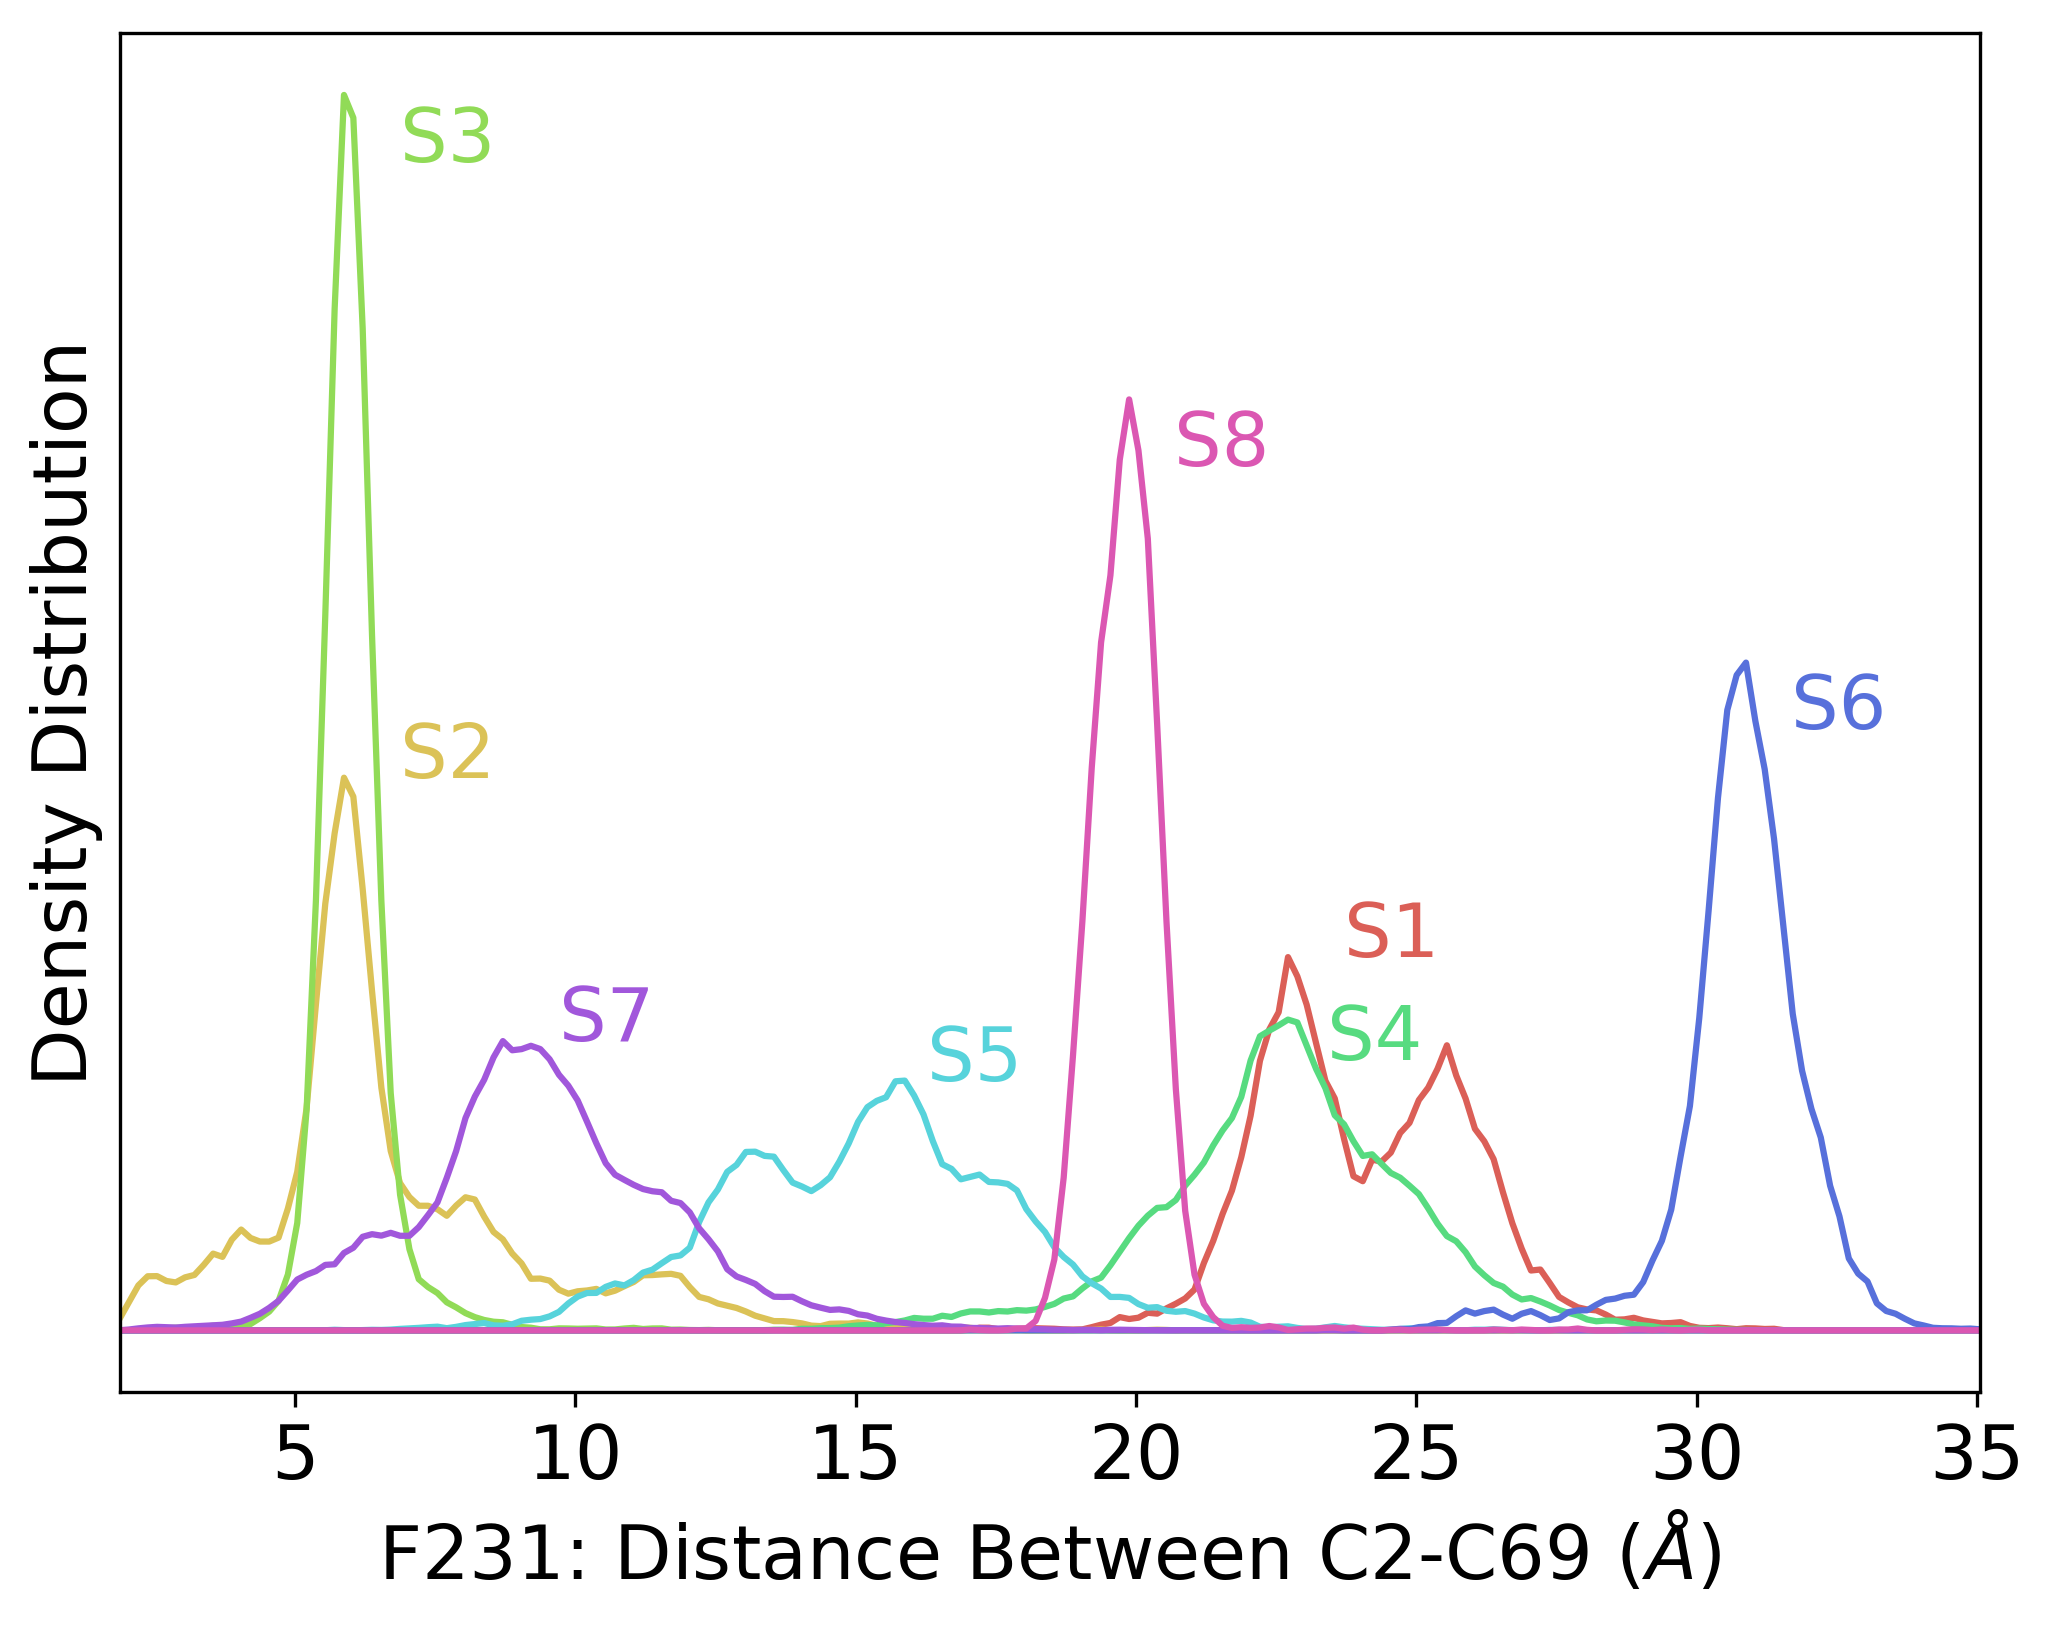

In [34]:
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({'font.size':18})
colors = [(0.85999999999999999, 0.37119999999999997, 0.33999999999999997), (0.85999999999999999, 0.7612000000000001, 0.33999999999999997), (0.56880000000000008, 0.85999999999999999, 0.33999999999999997), (0.33999999999999997, 0.85999999999999999, 0.50120000000000009), (0.33999999999999997, 0.82879999999999987, 0.85999999999999999), (0.33999999999999997, 0.43879999999999986, 0.85999999999999999), (0.63119999999999976, 0.33999999999999997, 0.85999999999999999), (0.85999999999999999, 0.33999999999999997, 0.69879999999999964)]


n=213
curr_data = np.zeros((8,200))

fig = plt.figure(figsize=(8,6),dpi=300)
ax=plt.gca()
fs_data = all_data_one[:,n] * 10;

xs = np.linspace(np.min(fs_data),np.max(fs_data),200)[:, np.newaxis]

for i in range(8):
    data = fs_data[all_label_one==i][:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data)
    log_dens = kde.score_samples(xs)
    curr_data[i] =  log_dens
    plt.plot(xs,np.exp(log_dens),label='S'+str(i+1),color=colors[i])
    if (i==2):
        plt.text(xs[np.argmax(log_dens)]+1, np.exp(log_dens)[np.argmax(log_dens)]-0.05,'S'+str(i+1),color=colors[i])
    elif (i==3):
        plt.text(xs[np.argmax(log_dens)]+0.7, np.exp(log_dens)[np.argmax(log_dens)]-0.03,'S'+str(i+1),color=colors[i])
    elif (i==4):
        plt.text(xs[np.argmax(log_dens)]+0.4, np.exp(log_dens)[np.argmax(log_dens)],'S'+str(i+1),color=colors[i])
    elif (i==7):
        plt.text(xs[np.argmax(log_dens)]+0.8, np.exp(log_dens)[np.argmax(log_dens)]-0.05,'S'+str(i+1),color=colors[i])
    elif (i==5):
        plt.text(xs[np.argmax(log_dens)]+0.8, np.exp(log_dens)[np.argmax(log_dens)]-0.05,'S'+str(i+1),color=colors[i])
    else:
        plt.text(xs[np.argmax(log_dens)]+1, np.exp(log_dens)[np.argmax(log_dens)],'S'+str(i+1),color=colors[i])
plt.xlim([np.min(fs_data),np.max(fs_data)])
plt.yticks([])
plt.ylabel("Density Distribution")
plt.xlabel(r"F231: Distance Between C2-C69 ($\AA$)")
#plt.legend()
plt.show()


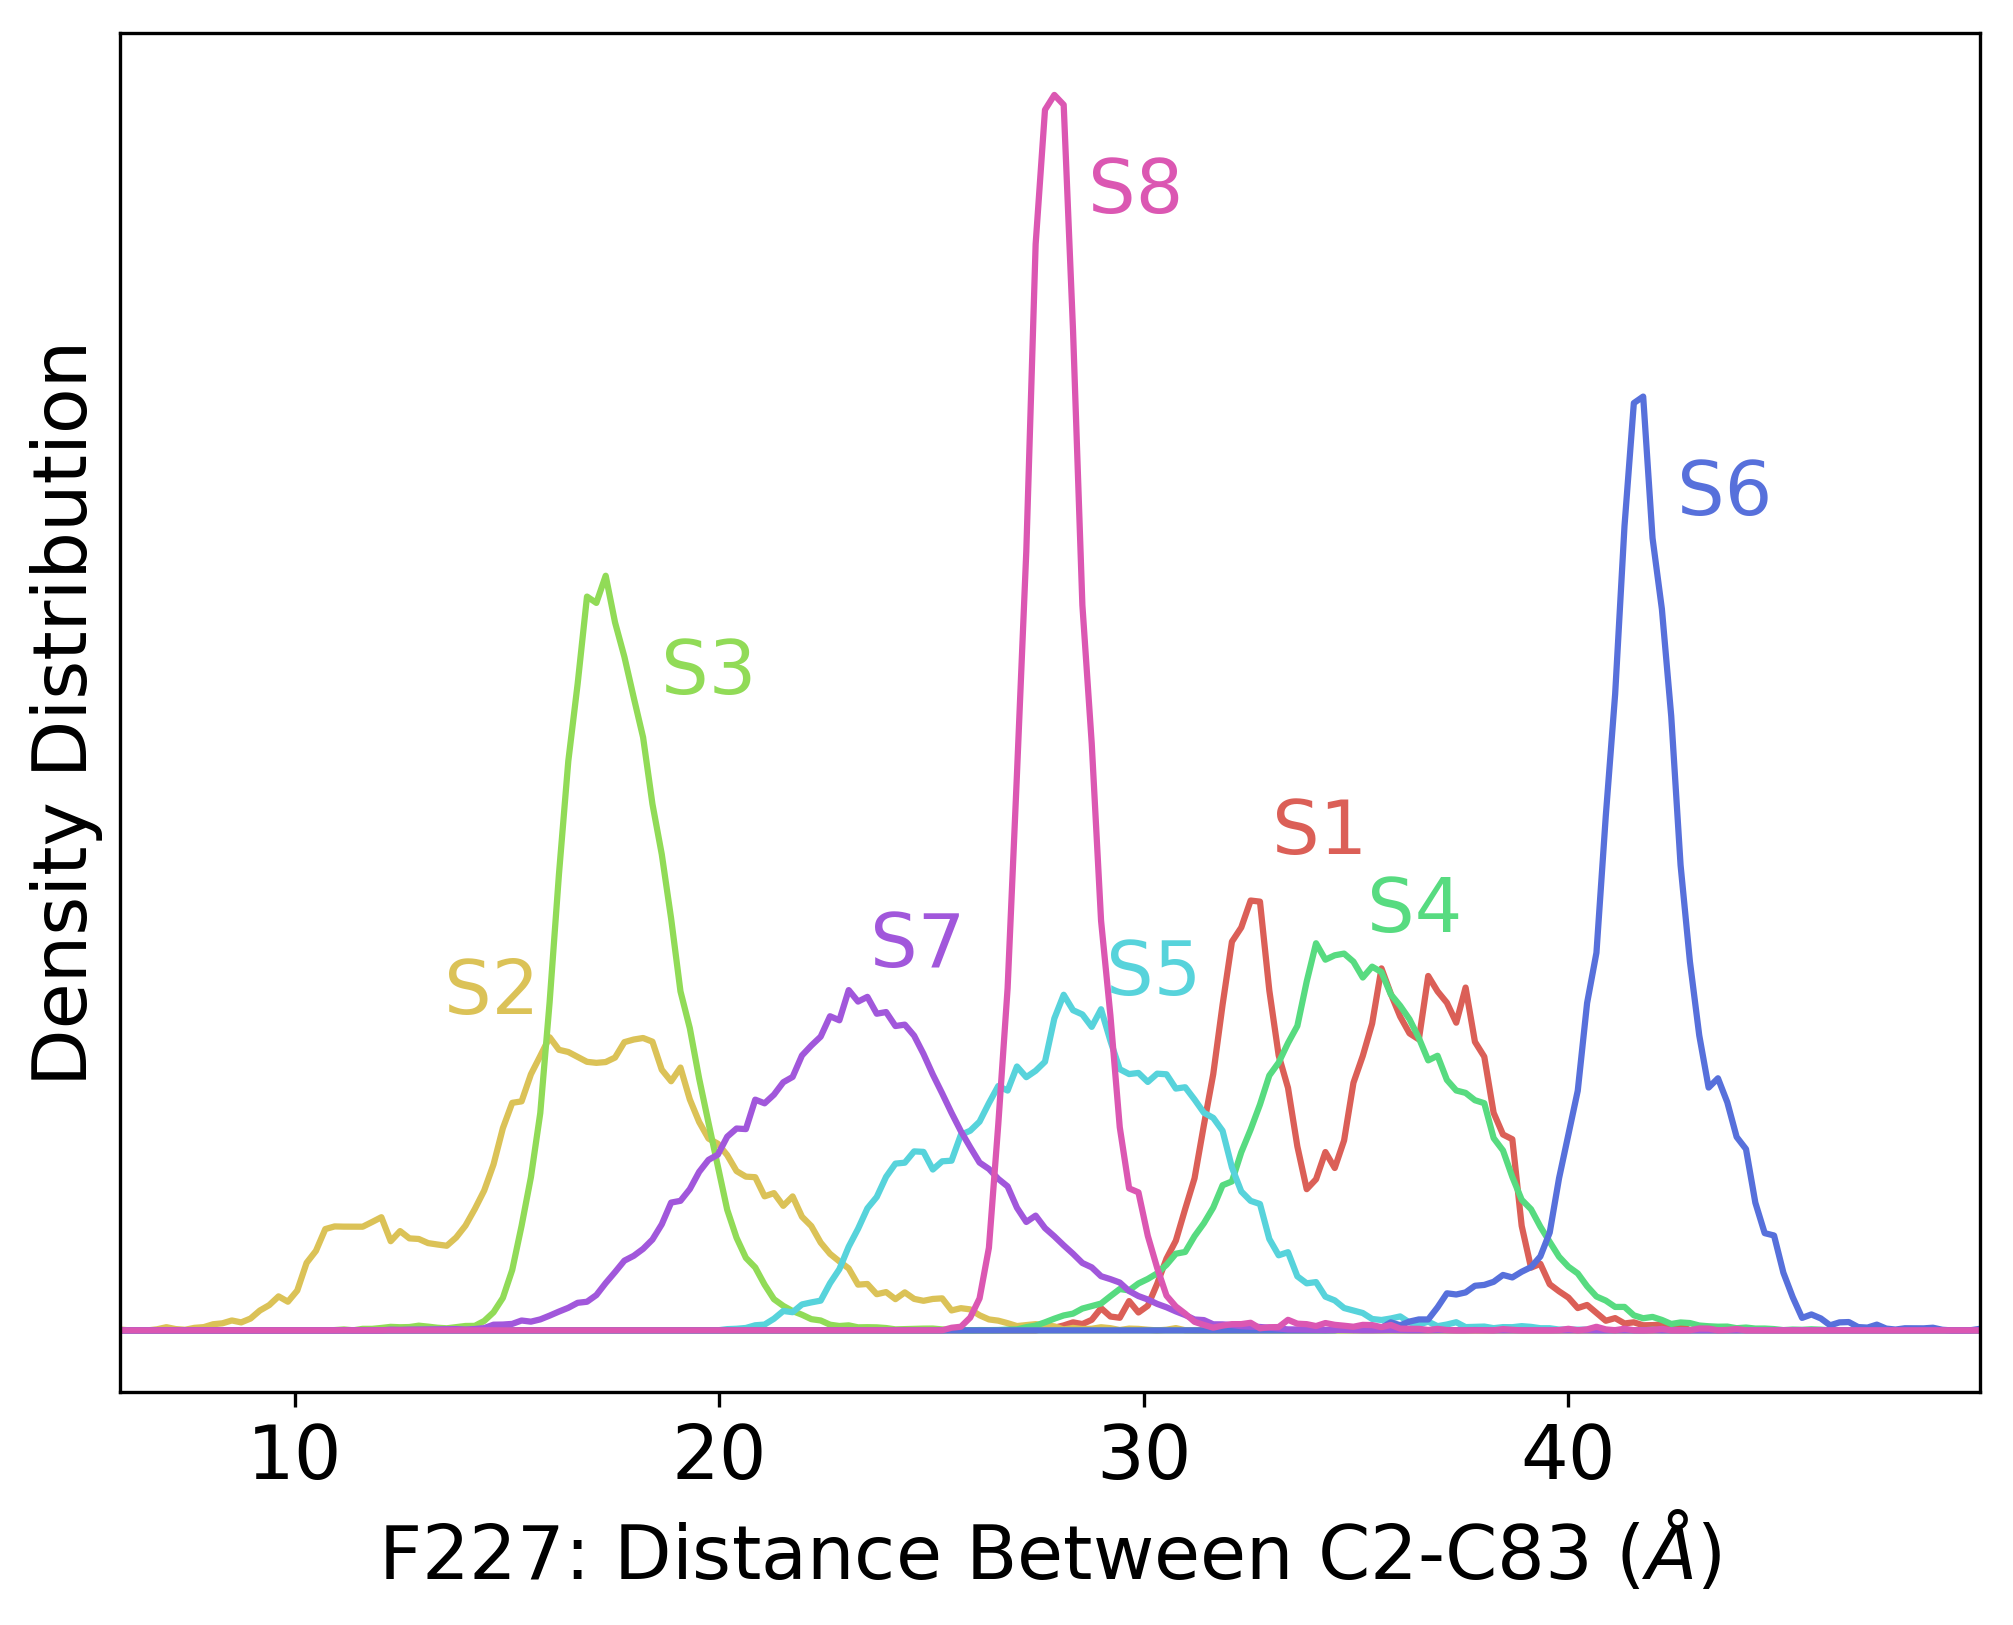

In [58]:
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({'font.size':18})
colors = [(0.85999999999999999, 0.37119999999999997, 0.33999999999999997), (0.85999999999999999, 0.7612000000000001, 0.33999999999999997), (0.56880000000000008, 0.85999999999999999, 0.33999999999999997), (0.33999999999999997, 0.85999999999999999, 0.50120000000000009), (0.33999999999999997, 0.82879999999999987, 0.85999999999999999), (0.33999999999999997, 0.43879999999999986, 0.85999999999999999), (0.63119999999999976, 0.33999999999999997, 0.85999999999999999), (0.85999999999999999, 0.33999999999999997, 0.69879999999999964)]


n=227
curr_data = np.zeros((8,200))

fig = plt.figure(figsize=(8,6),dpi=300)
ax=plt.gca()
fs_data = all_data_one[:,n] * 10;

xs = np.linspace(np.min(fs_data),np.max(fs_data),200)[:, np.newaxis]

for i in range(8):
    data = fs_data[all_label_one==i][:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data)
    log_dens = kde.score_samples(xs)
    curr_data[i] =  log_dens
    plt.plot(xs,np.exp(log_dens),label='S'+str(i+1),color=colors[i])
    if (i==2):
        plt.text(xs[np.argmax(log_dens)]+1.3, np.exp(log_dens)[np.argmax(log_dens)]-0.05,'S'+str(i+1),color=colors[i])
    elif (i==3):
        plt.text(xs[np.argmax(log_dens)]+1.2, np.exp(log_dens)[np.argmax(log_dens)]+0.005,'S'+str(i+1),color=colors[i])
    elif (i==4):
        plt.text(xs[np.argmax(log_dens)]+1.0, np.exp(log_dens)[np.argmax(log_dens)],'S'+str(i+1),color=colors[i])
    elif (i==7):
        plt.text(xs[np.argmax(log_dens)]+0.8, np.exp(log_dens)[np.argmax(log_dens)]-0.05,'S'+str(i+1),color=colors[i])
    elif (i==5):
        plt.text(xs[np.argmax(log_dens)]+0.8, np.exp(log_dens)[np.argmax(log_dens)]-0.05,'S'+str(i+1),color=colors[i])
    elif (i==1):
        plt.text(xs[np.argmax(log_dens)]-2.5, np.exp(log_dens)[np.argmax(log_dens)]+0.01,'S'+str(i+1),color=colors[i])
    elif (i==6):
        plt.text(xs[np.argmax(log_dens)]+0.5, np.exp(log_dens)[np.argmax(log_dens)]+0.01,'S'+str(i+1),color=colors[i])
    elif (i==0):
        plt.text(xs[np.argmax(log_dens)]+0.5, np.exp(log_dens)[np.argmax(log_dens)]+0.02,'S'+str(i+1),color=colors[i])
    else:
        plt.text(xs[np.argmax(log_dens)]+1, np.exp(log_dens)[np.argmax(log_dens)],'S'+str(i+1),color=colors[i])
plt.xlim([np.min(fs_data),np.max(fs_data)])
plt.yticks([])
plt.ylabel("Density Distribution")
plt.xlabel(r"F227: Distance Between C2-C83 ($\AA$)")
#plt.legend()
plt.show()


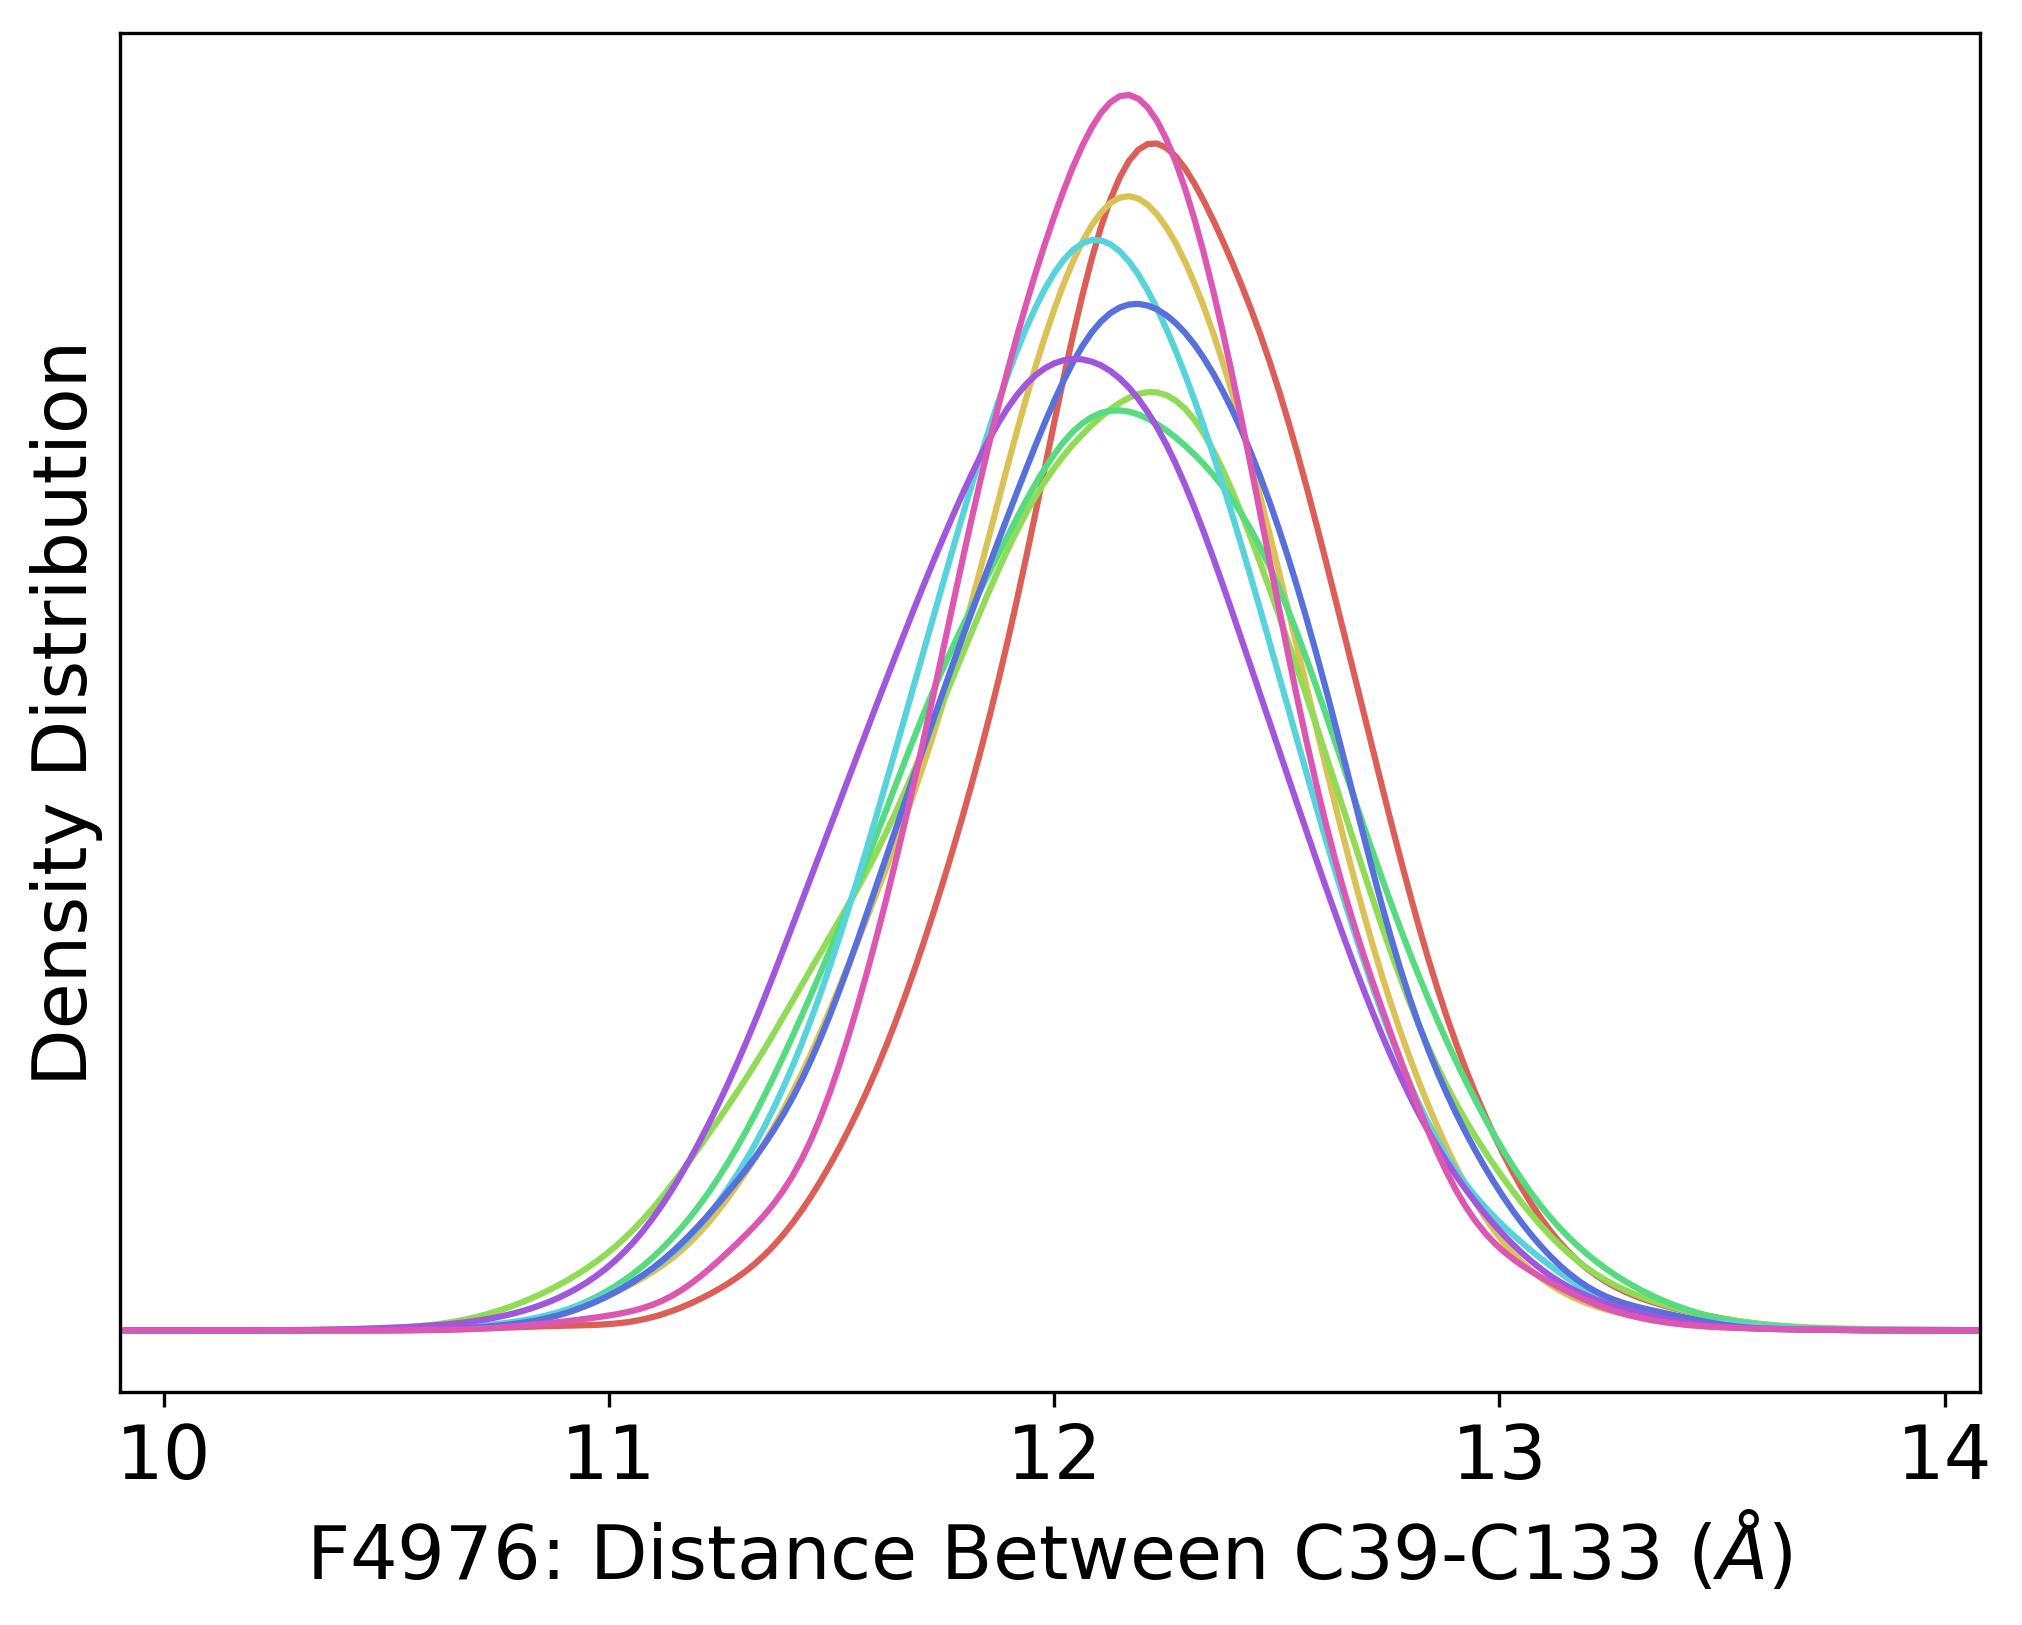

In [70]:
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({'font.size':18})
colors = [(0.85999999999999999, 0.37119999999999997, 0.33999999999999997), (0.85999999999999999, 0.7612000000000001, 0.33999999999999997), (0.56880000000000008, 0.85999999999999999, 0.33999999999999997), (0.33999999999999997, 0.85999999999999999, 0.50120000000000009), (0.33999999999999997, 0.82879999999999987, 0.85999999999999999), (0.33999999999999997, 0.43879999999999986, 0.85999999999999999), (0.63119999999999976, 0.33999999999999997, 0.85999999999999999), (0.85999999999999999, 0.33999999999999997, 0.69879999999999964)]


n=4976
curr_data = np.zeros((8,200))

fig = plt.figure(figsize=(8,6),dpi=300)
ax=plt.gca()
fs_data = all_data_one[:,n] * 10;

xs = np.linspace(np.min(fs_data),np.max(fs_data),200)[:, np.newaxis]

for i in range(8):
    data = fs_data[all_label_one==i][:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data)
    log_dens = kde.score_samples(xs)
    curr_data[i] =  log_dens
    plt.plot(xs,np.exp(log_dens),label='S'+str(i+1),color=colors[i])
    #plt.text(xs[np.argmax(log_dens)]+1, np.exp(log_dens)[np.argmax(log_dens)],'S'+str(i+1),color=colors[i])
plt.xlim([np.min(fs_data),np.max(fs_data)])
plt.yticks([])
plt.ylabel("Density Distribution")
plt.xlabel(r"F4976: Distance Between C39-C133 ($\AA$)")
#plt.legend()
plt.show()

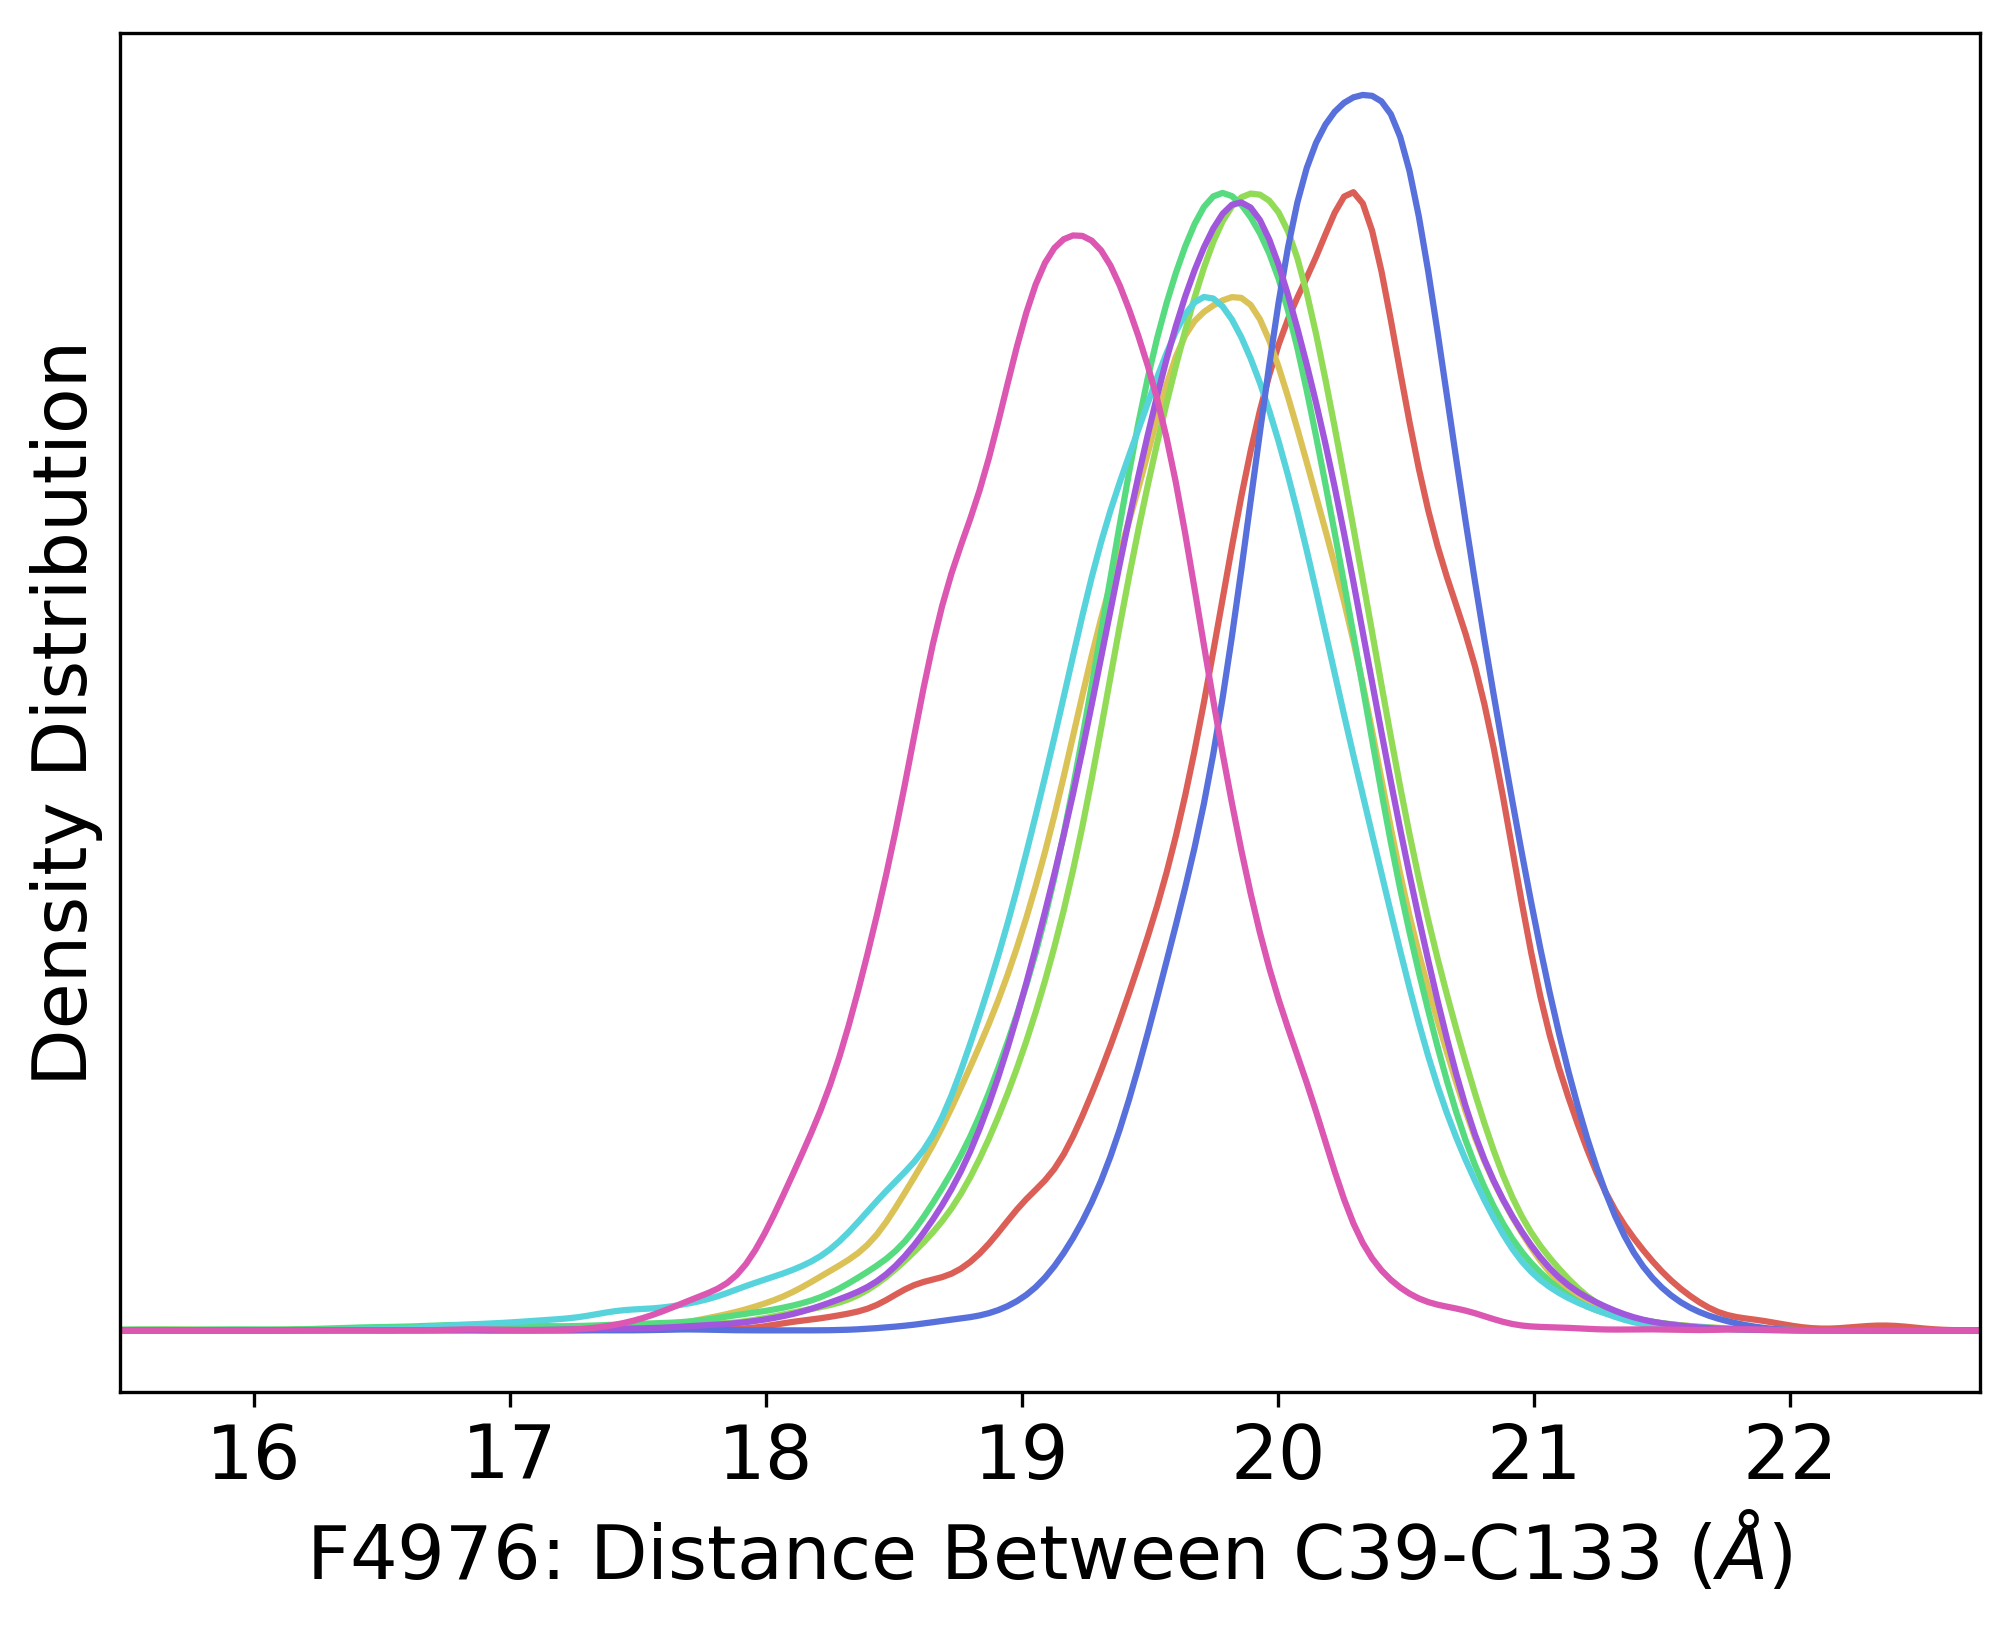

In [5]:
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({'font.size':18})
colors = [(0.85999999999999999, 0.37119999999999997, 0.33999999999999997), (0.85999999999999999, 0.7612000000000001, 0.33999999999999997), (0.56880000000000008, 0.85999999999999999, 0.33999999999999997), (0.33999999999999997, 0.85999999999999999, 0.50120000000000009), (0.33999999999999997, 0.82879999999999987, 0.85999999999999999), (0.33999999999999997, 0.43879999999999986, 0.85999999999999999), (0.63119999999999976, 0.33999999999999997, 0.85999999999999999), (0.85999999999999999, 0.33999999999999997, 0.69879999999999964)]


n=2099
curr_data = np.zeros((8,200))

fig = plt.figure(figsize=(8,6),dpi=300)
ax=plt.gca()
fs_data = all_data_one[:,n] * 10;

xs = np.linspace(np.min(fs_data),np.max(fs_data),200)[:, np.newaxis]

for i in range(8):
    data = fs_data[all_label_one==i][:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data)
    log_dens = kde.score_samples(xs)
    curr_data[i] =  log_dens
    plt.plot(xs,np.exp(log_dens),label='S'+str(i+1),color=colors[i])
    #plt.text(xs[np.argmax(log_dens)]+1, np.exp(log_dens)[np.argmax(log_dens)],'S'+str(i+1),color=colors[i])
plt.xlim([np.min(fs_data),np.max(fs_data)])
plt.yticks([])
plt.ylabel("Density Distribution")
plt.xlabel(r"F4976: Distance Between C39-C133 ($\AA$)")
#plt.legend()
plt.show()

np.save('all_data_one', all_data_one)


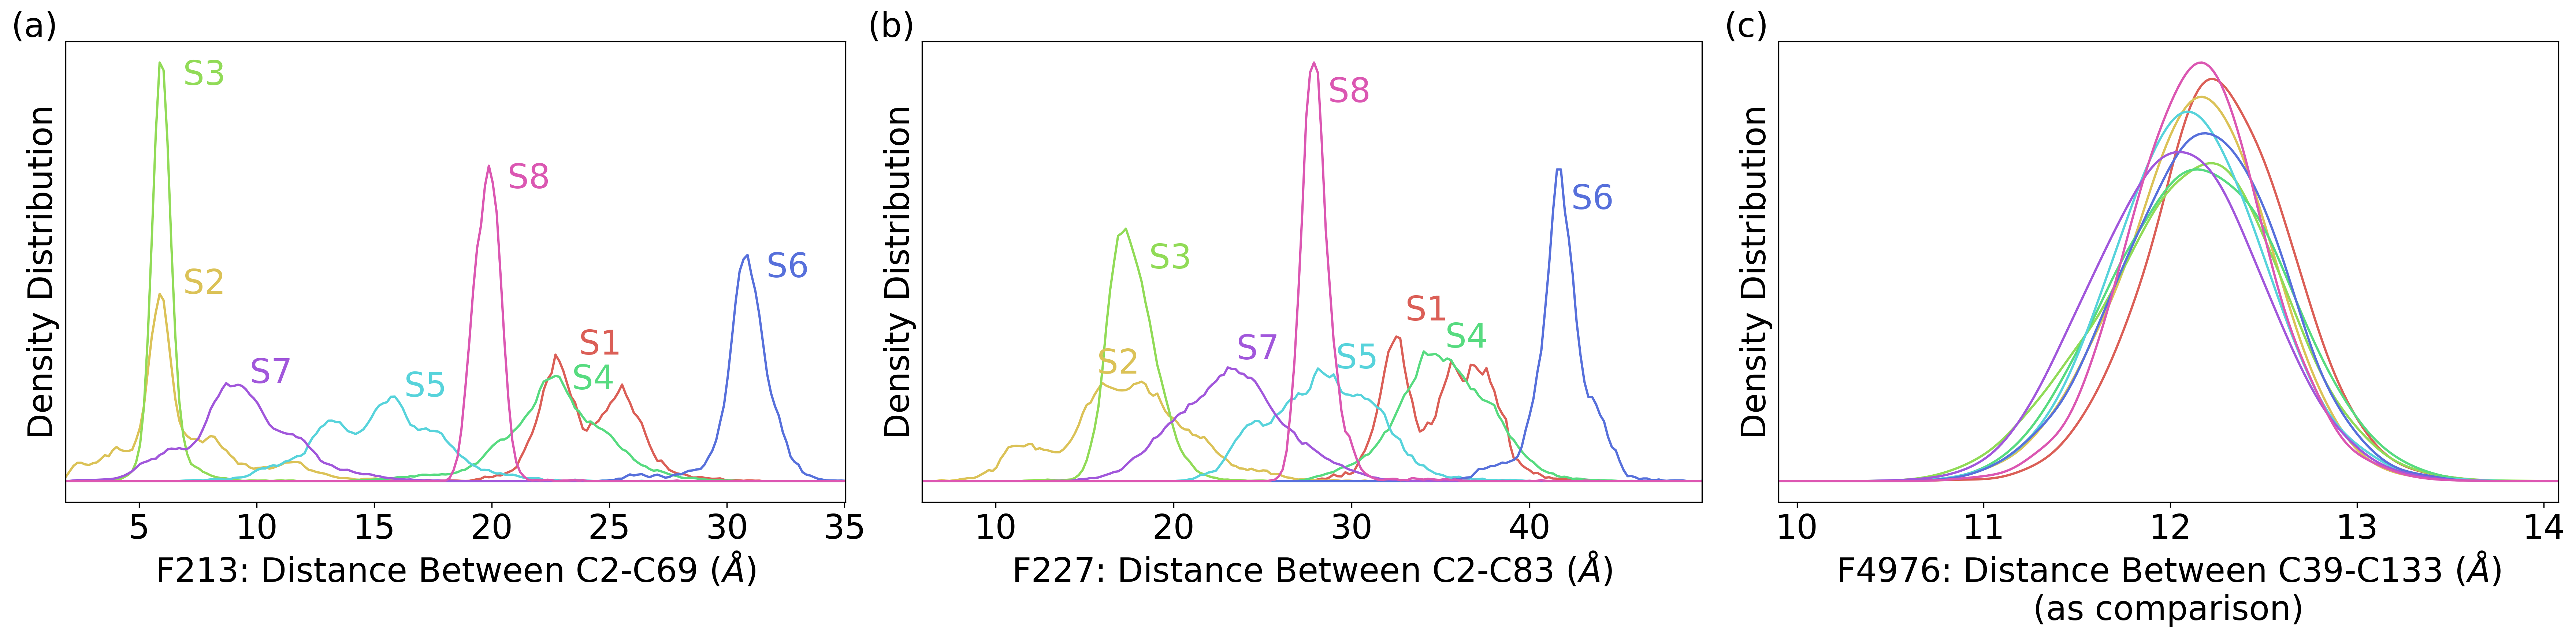

In [99]:
%matplotlib inline
mpl.rcParams.update({'font.size':22})

fig = plt.figure(figsize=(24,6),dpi=300)
ax=plt.subplot(1,3,1)

n=213
curr_data = np.zeros((8,200))
fs_data = all_data_one[:,n] * 10;
fs_data = all_data_one[:,n] * 10;

xs = np.linspace(np.min(fs_data),np.max(fs_data),200)[:, np.newaxis]

for i in range(8):
    data = fs_data[all_label_one==i][:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data)
    log_dens = kde.score_samples(xs)
    curr_data[i] =  log_dens
    plt.plot(xs,np.exp(log_dens),label='S'+str(i+1),color=colors[i])
    if (i==2):
        plt.text(xs[np.argmax(log_dens)]+1, np.exp(log_dens)[np.argmax(log_dens)]-0.05,'S'+str(i+1),color=colors[i])
    elif (i==3):
        plt.text(xs[np.argmax(log_dens)]+0.7, np.exp(log_dens)[np.argmax(log_dens)]-0.03,'S'+str(i+1),color=colors[i])
    elif (i==4):
        plt.text(xs[np.argmax(log_dens)]+0.4, np.exp(log_dens)[np.argmax(log_dens)],'S'+str(i+1),color=colors[i])
    elif (i==7):
        plt.text(xs[np.argmax(log_dens)]+0.8, np.exp(log_dens)[np.argmax(log_dens)]-0.05,'S'+str(i+1),color=colors[i])
    elif (i==5):
        plt.text(xs[np.argmax(log_dens)]+0.8, np.exp(log_dens)[np.argmax(log_dens)]-0.05,'S'+str(i+1),color=colors[i])
    else:
        plt.text(xs[np.argmax(log_dens)]+1, np.exp(log_dens)[np.argmax(log_dens)],'S'+str(i+1),color=colors[i])
plt.xlim([np.min(fs_data),np.max(fs_data)])
plt.yticks([])
plt.ylabel("Density Distribution")
plt.xlabel(r"F213: Distance Between C2-C69 ($\AA$)")
plt.text(-0.07,1.01,'(a)',transform=ax.transAxes)

ax=plt.subplot(1,3,2)
n=227
fs_data = all_data_one[:,n] * 10;

xs = np.linspace(np.min(fs_data),np.max(fs_data),200)[:, np.newaxis]

for i in range(8):
    data = fs_data[all_label_one==i][:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=0.13).fit(data)
    log_dens = kde.score_samples(xs)
    curr_data[i] =  log_dens
    plt.plot(xs,np.exp(log_dens),label='S'+str(i+1),color=colors[i])
    if (i==2):
        plt.text(xs[np.argmax(log_dens)]+1.3, np.exp(log_dens)[np.argmax(log_dens)]-0.05,'S'+str(i+1),color=colors[i])
    elif (i==3):
        plt.text(xs[np.argmax(log_dens)]+1.2, np.exp(log_dens)[np.argmax(log_dens)]+0.005,'S'+str(i+1),color=colors[i])
    elif (i==4):
        plt.text(xs[np.argmax(log_dens)]+1.0, np.exp(log_dens)[np.argmax(log_dens)],'S'+str(i+1),color=colors[i])
    elif (i==7):
        plt.text(xs[np.argmax(log_dens)]+0.8, np.exp(log_dens)[np.argmax(log_dens)]-0.05,'S'+str(i+1),color=colors[i])
    elif (i==5):
        plt.text(xs[np.argmax(log_dens)]+0.8, np.exp(log_dens)[np.argmax(log_dens)]-0.05,'S'+str(i+1),color=colors[i])
    elif (i==1):
        plt.text(xs[np.argmax(log_dens)]-2.5, np.exp(log_dens)[np.argmax(log_dens)]+0.01,'S'+str(i+1),color=colors[i])
    elif (i==6):
        plt.text(xs[np.argmax(log_dens)]+0.5, np.exp(log_dens)[np.argmax(log_dens)]+0.01,'S'+str(i+1),color=colors[i])
    elif (i==0):
        plt.text(xs[np.argmax(log_dens)]+0.5, np.exp(log_dens)[np.argmax(log_dens)]+0.02,'S'+str(i+1),color=colors[i])
    else:
        plt.text(xs[np.argmax(log_dens)]+1, np.exp(log_dens)[np.argmax(log_dens)],'S'+str(i+1),color=colors[i])
plt.xlim([np.min(fs_data),np.max(fs_data)])
plt.yticks([])
plt.ylabel("Density Distribution")
plt.xlabel(r"F227: Distance Between C2-C83 ($\AA$)")
plt.text(-0.07,1.01,'(b)',transform=ax.transAxes)

ax=plt.subplot(1,3,3)
n=4976
curr_data = np.zeros((8,200))
fs_data = all_data_one[:,n] * 10;

xs = np.linspace(np.min(fs_data),np.max(fs_data),200)[:, np.newaxis]

for i in range(8):
    data = fs_data[all_label_one==i][:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data)
    log_dens = kde.score_samples(xs)
    curr_data[i] =  log_dens
    plt.plot(xs,np.exp(log_dens),label='S'+str(i+1),color=colors[i])
    #plt.text(xs[np.argmax(log_dens)]+1, np.exp(log_dens)[np.argmax(log_dens)],'S'+str(i+1),color=colors[i])
plt.xlim([np.min(fs_data),np.max(fs_data)])
plt.yticks([])
plt.ylabel("Density Distribution")
plt.xlabel(r"F4976: Distance Between C39-C133 ($\AA$)"+"\n(as comparison)")
plt.xticks([10,11,12,13,14])
plt.text(-0.07,1.01,'(c)',transform=ax.transAxes)

plt.tight_layout()
plt.savefig("Figure9.png")

In [4]:
all_feature_sort.sort_values(by='s1_s6',ascending=False)[['distance','s1_s6',]].iloc[0:4]

,distance,s1_s6
355,c3_c66,0.053157
746,c6_c28,0.052329
595,c5_c19,0.037056
213,c2_c69,0.036348


In [58]:
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import matplotlib as mpl
bbox_props = dict(boxstyle="round,pad=0.5", fc="white", ec="gray", lw=1)
mpl.rcParams.update({'font.size':18})
colors = [(0.85999999999999999, 0.37119999999999997, 0.33999999999999997), (0.85999999999999999, 0.7612000000000001, 0.33999999999999997), (0.56880000000000008, 0.85999999999999999, 0.33999999999999997), (0.33999999999999997, 0.85999999999999999, 0.50120000000000009), (0.33999999999999997, 0.82879999999999987, 0.85999999999999999), (0.33999999999999997, 0.43879999999999986, 0.85999999999999999), (0.63119999999999976, 0.33999999999999997, 0.85999999999999999), (0.85999999999999999, 0.33999999999999997, 0.69879999999999964)]


n=355
fig = plt.figure(figsize=(8,6),dpi=300)
ax=plt.gca()
fs_data1 = all_data_one[:,355] * 10;
fs_data2 = all_data_one[:,746] * 10;
fs_data3 = all_data_one[:,595] * 10;
fs_data4 = all_data_one[:,213] * 10;
fs_data = np.concatenate([fs_data1,fs_data2,fs_data3,fs_data4])
xs = np.linspace(np.min(fs_data),np.max(fs_data),500)[:, np.newaxis]
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 2, wspace=0.00,hspace=0)

ax = plt.subplot(gs[0,0])
data = fs_data1[all_label_one==0][:, np.newaxis]
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data)
log_dens = kde.score_samples(xs)
plt.plot(xs,np.exp(log_dens),color=colors[0], label='State1')

data = fs_data1[all_label_one==5][:, np.newaxis]
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data)
log_dens = kde.score_samples(xs)
plt.plot(xs,np.exp(log_dens),label='State6',color=colors[5])
ax.set_xticks([])
ax.set_yticklabels([])

ax.set_title("State1-State6 Distribution",y=1.05,x=1.1)
plt.text(0.05,0.85,"F355: C3-C66",bbox=bbox_props,fontsize=14,transform=ax.transAxes)

ax = plt.subplot(gs[0,1])
data = fs_data2[all_label_one==0][:, np.newaxis]
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data)
log_dens = kde.score_samples(xs)
plt.plot(xs,np.exp(log_dens),label='State1',color=colors[0])

data = fs_data2[all_label_one==5][:, np.newaxis]
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data)
log_dens = kde.score_samples(xs)
plt.plot(xs,np.exp(log_dens),label='State6',color=colors[5])
ax.set_xticks([])
ax.set_yticks([])
plt.legend(bbox_to_anchor=(0.7,1),fontsize=14)
plt.text(0.05,0.85,"F746: C6-C28",bbox=bbox_props,fontsize=14,transform=ax.transAxes)

ax = plt.subplot(gs[1,0])
data = fs_data3[all_label_one==0][:, np.newaxis]
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data)
log_dens = kde.score_samples(xs)
plt.plot(xs,np.exp(log_dens),label='S1',color=colors[0])

data = fs_data3[all_label_one==5][:, np.newaxis]
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data)
log_dens = kde.score_samples(xs)
plt.plot(xs,np.exp(log_dens),label='S6',color=colors[5])
ax.set_yticklabels([])
plt.text(0.525,0.85,"F595: C5-C19",bbox=bbox_props,fontsize=14,transform=ax.transAxes)

ax = plt.subplot(gs[1,1])
data = fs_data4[all_label_one==0][:, np.newaxis]
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data)
log_dens = kde.score_samples(xs)
plt.plot(xs,np.exp(log_dens),label='S1',color=colors[0])

data = fs_data4[all_label_one==5][:, np.newaxis]
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data)
log_dens = kde.score_samples(xs)
plt.plot(xs,np.exp(log_dens),label='S6',color=colors[5])


plt.xlim([np.min(fs_data),np.max(fs_data)])
plt.yticks([])
plt.ylabel("Density Distribution")
plt.xlabel(r"Distance ($\AA$)")
ax.xaxis.set_label_coords(0, -0.15)
ax.yaxis.set_label_coords(-1.1, 1)
plt.text(0.05,0.85,"F213: C2-C69",bbox=bbox_props,fontsize=14,transform=ax.transAxes)


ax.set_yticks([])
#plt.legend()

plt.savefig("Figure11.png")